In [ ]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from scipy.signal import savgol_filter

# Loading GALEX UV data
fuv_file = "AIS_132_sg36-fd-int.fits"  # FUV Intensity
nuv_file = "AIS_132_sg36-nd-int.fits"  # NUV Intensity

fuv_data = fits.open(fuv_file)[0].data
nuv_data = fits.open(nuv_file)[0].data
print("✅ GALEX UV files loaded.")

# Loading JWST IR data (using i2d)
jwst_i2d = fits.open("jw02741014001_02101_00001_mirimage_i2d.fits")
jwst_data = jwst_i2d[1].data
print("✅ JWST IR i2d file loaded.")


✅ GALEX UV files loaded.
✅ JWST IR i2d file loaded.


In [ ]:
# Installing required library
!pip install astropy

# Importing required modules
from astropy.io import fits
import os

# List of FITS files
fits_files = [
    "jw02722-o002_t001_miri_p750l-slitlessprism_x1dints.fits",
    "jw02722-o003_t001_niriss_clear-gr700xd-substrip256_x1dints.fits",
    "jw02722-o004_t001_miri_p750l-slitlessprism_x1dints.fits",
    "idb812h0q_flt.fits"
]

# Inspecting structure and HDU info for each available file
fits_summaries = {}

for file in fits_files:
    if os.path.exists(file):
        try:
            with fits.open(file) as hdul:
                summary = []
                for i, hdu in enumerate(hdul):
                    summary.append({
                        "HDU": i,
                        "Name": hdu.name,
                        "Type": type(hdu).__name__,
                        "Shape": hdu.data.shape if hdu.data is not None else None,
                        "Columns": hdu.columns.names if hasattr(hdu, "columns") else None
                    })
                fits_summaries[file] = summary
        except Exception as e:
            fits_summaries[file] = f"Failed to open: {str(e)}"
    else:
        fits_summaries[file] = "File not found."

# Printing summary of each FITS file
import pprint
pprint.pprint(fits_summaries)


In [ ]:
# Installing required package
!pip install fpdf

from fpdf import FPDF

# Defining checklist steps
checklist = [
    ("Step 1: Multi-Wavelength Data Integration",
     "Combine GALEX (FUV, NUV) and JWST MIRI (5–12 µm) datasets for broad spectral coverage."),

    ("Step 2: Multi-HDU Spectral Stacking and Noise Suppression",
     "Extract and stack spectral HDUs from JWST .fits files using median resampling and Savitzky-Golay smoothing."),

    ("Step 3: UV Analysis and Scattering Slope",
     "Compute FUV/NUV ratio and UV spectral slope (β). Detect haze presence through Rayleigh scattering profile."),

    ("Step 4: Molecular Band Detection",
     "Identify absorption bands (e.g., H₂O, CH₄, N₂O) and calculate σ-confidence levels for each detection."),

    ("Step 5: Blackbody Thermal Fitting",
     "Fit Planck curve to infrared spectrum. Determine best-fit temperature (~550 K) and observe flattening."),

    ("Step 6: PHOENIX SED Overlay & Reverse Signature Theory",
     "Compare host star’s synthetic SED with IR emission. Validate re-emission of absorbed UV as IR energy."),

    ("Step 7: Atmospheric Layer Modeling",
     "Define a three-layer model: haze, photochemical transition zone, and greenhouse base."),

    ("Step 8: Habitability and Biosignature Assessment",
     "Assess thermal shielding, chemical disequilibrium, and detection of multiple biosignature gases."),

    ("Step 9: Generalization of Framework",
     "Adapt framework to other thick-atmosphere exoplanets. Plan future automation and AI integration.")
]

# Creating PDF
pdf = FPDF()
pdf.set_auto_page_break(auto=True, margin=15)
pdf.add_page()
pdf.set_font("Arial", 'B', 16)
pdf.cell(0, 10, "Exoplanet Atmosphere Detection Framework - Checklist", ln=True, align='C')

pdf.set_font("Arial", '', 12)
pdf.ln(5)
for title, desc in checklist:
    pdf.set_font("Arial", 'B', 12)
    pdf.multi_cell(0, 10, title, border=0)
    pdf.set_font("Arial", '', 12)
    pdf.multi_cell(0, 8, f"- {desc}", border=0)
    pdf.ln(2)

# Saving to file
output_path = "Exoplanet_Atmospheric_Framework_Checklist.pdf"
pdf.output(output_path)

# Displaying download link
from google.colab import files
files.download(output_path)


  Preparing metadata (setup.py) ... done
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40704 sha256=380b9d4d2ac108a398ad96167f8f75a68f9d9bca934c1ab7d9983b7ec1a8e1cb
  Stored in directory: /root/.cache/pip/wheels/65/4f/66/bbda9866da446a72e206d6484cd97381cbc7859a7068541c36
Successfully built fpdf


UnicodeEncodeError: 'latin-1' codec can't encode character '\u2013' in position 302: ordinal not in range(256)

In [ ]:
import os
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

# List of Uploaded Fits Files
fits_filenames = [
    "jw02741014001_02101_00001_mirimage_cal.fits",
    "jw02741014001_02101_00001_mirimage_i2d.fits",
    "jw02741014001_02101_00001_mirimage_rate.fits",
    "jw02741014001_02101_00001_mirimage_rateints.fits",
    "jw02741014001_02101_00001_mirimage_uncal.fits"
]

# Attempting to extract 1D spectra from each file
spectra = []
wavelengths = []

for fname in fits_filenames:
    try:
        with fits.open(fname) as hdul:
            for hdu in hdul:
                if hasattr(hdu, 'data') and isinstance(hdu.data, np.ndarray):
                    data = hdu.data
                    if data.ndim == 1 and len(data) > 10:
                        spectra.append(data)
                        # Faking wavelengths just for shape consistency (will fix later)
                        wavelengths.append(np.linspace(5, 12, len(data)))
    except Exception as e:
        print(f"Error loading {fname}: {e}")

# Step 3: Normalizing, smoothing, and stacking
normalized_spectra = [s / np.nanmax(s) for s in spectra]
smoothed_spectra = [savgol_filter(s, 21, 3) for s in normalized_spectra]
stacked_spectrum = np.nanmedian(np.array(smoothed_spectra), axis=0)
stacked_wavelengths = wavelengths[0] if wavelengths else np.linspace(5, 12, len(stacked_spectrum))

# Saving the results for next stage (band detection)
spectrum_final = stacked_spectrum
wavelengths_final = stacked_wavelengths

# Ploting the final smoothed, SNR-boosted spectrum
plt.figure(figsize=(12, 6))
plt.plot(wavelengths_final, spectrum_final, color='blue', label='SNR-Boosted Spectrum')
plt.xlabel("Wavelength (μm)")
plt.ylabel("Normalized Flux")
plt.title("Final JWST MIRI SNR-Boosted Spectrum")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/numpy/lib/_nanfunctions_impl.py:1231: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


TypeError: object of type 'numpy.float64' has no len()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.ndimage import gaussian_filter1d

# Smoothing the flux to reduce false peaks
smoothed_flux = gaussian_filter1d(final_snr_boosted_flux, sigma=1)

# Inverting flux to find absorption dips
inverted_flux = 1 - smoothed_flux
peaks, _ = find_peaks(inverted_flux, height=0.01, distance=10)

# Defining molecular candidates and bands (approximate centers in μm)
molecular_bands = {
    "H₂O (Water Vapor)": [5.5, 6.3],
    "CH₄ (Methane)": [7.7],
    "N₂O (Nitrous Oxide)": [7.05],
    "CO (Carbon Monoxide)": [4.9],
    "PH₃ (Phosphine)": [4.85],
    "NH₃ (Ammonia)": [9.4],
    "O₃ (Ozone)": [9.6],
    "SO₂ / H₂S": [10.5],
}

# Tolerance for match (μm)
tolerance = 0.15

# Detecting, measuring, and printing results
print("\n📊 Detected Molecular Absorption Features:\n")

plt.figure(figsize=(12, 6))
plt.plot(wavelengths_um, final_snr_boosted_flux, label='Final SNR-Boosted Spectrum', color='blue')
plt.title("Final JWST SNR-Boosted Spectrum (Auto-Labeled Molecules)")
plt.xlabel("Wavelength (μm)")
plt.ylabel("Normalized Flux")

for idx in peaks:
    λ = wavelengths_um[idx]
    flux_val = final_snr_boosted_flux[idx]
    baseline = np.median(final_snr_boosted_flux[max(0, idx-15):idx+15])
    noise = np.std(final_snr_boosted_flux[max(0, idx-20):idx+20])
    depth = baseline - flux_val
    sigma_conf = depth / (noise + 1e-6)

    # Matching to known molecule
    matched = None
    for molecule, centers in molecular_bands.items():
        for center in centers:
            if abs(λ - center) <= tolerance:
                matched = molecule
                break
        if matched:
            break

    if matched and sigma_conf > 5:
        print(f"✅ {matched} detected near {λ:.2f} μm")
        print(f"   → Depth: {depth:.3f}, Noise: {noise:.5f}, σ: {sigma_conf:.2f}")
        plt.axvline(λ, color='red', linestyle='--')
        plt.text(λ + 0.03, flux_val + 0.015, f"{matched}\n({sigma_conf:.1f}σ)", color='darkred', fontsize=9)

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


NameError: name 'final_snr_boosted_flux' is not defined

In [ ]:
plt.plot(wavelengths_um, flux_stacked, label='Final SNR-Boosted Spectrum')


NameError: name 'wavelengths_um' is not defined

In [ ]:
plt.plot(wavelength_grid, stacked_spectrum)


NameError: name 'wavelength_grid' is not defined

In [ ]:
# Defining ROI
roi_size = 50
center_fuv = np.array(fuv_data.shape) // 2
center_nuv = np.array(nuv_data.shape) // 2

# Extracting summed UV fluxes
fuv_flux = np.nansum(fuv_data[
    center_fuv[0]-roi_size//2:center_fuv[0]+roi_size//2,
    center_fuv[1]-roi_size//2:center_fuv[1]+roi_size//2])

nuv_flux = np.nansum(nuv_data[
    center_nuv[0]-roi_size//2:center_nuv[0]+roi_size//2,
    center_nuv[1]-roi_size//2:center_nuv[1]+roi_size//2])

print(f" FUV Flux (summed): {fuv_flux:.2f}")
print(f" NUV Flux (summed): {nuv_flux:.2f}")

# Collapsing JWST IR data
collapsed_ir = np.nansum(jwst_data, axis=0)
collapsed_ir = np.nan_to_num(collapsed_ir)  # removing NaNs safely
print(f" JWST IR Spectrum collapsed. Length: {len(collapsed_ir)}")


🔵 FUV Flux (summed): 1.65
🟣 NUV Flux (summed): 10.29
✅ JWST IR Spectrum collapsed. Length: 1029


In [ ]:
# Normalizing UV
uv_flux_total = fuv_flux + nuv_flux
fuv_norm = fuv_flux / uv_flux_total
nuv_norm = nuv_flux / uv_flux_total

# Normalizing IR
collapsed_ir_norm = collapsed_ir / np.nanmax(collapsed_ir)

print("✅ Normalized UV and IR fluxes ready.")


✅ Normalized UV and IR fluxes ready.


In [ ]:
# GALEX effective wavelengths
fuv_lambda_um = 153.0 / 1000  # μm
nuv_lambda_um = 231.0 / 1000  # μm

# Assuming basic stellar incident UV (relative)
incident_fuv = 1.0  # arbitrary units
incident_nuv = 1.0  # arbitrary units

# Approximating reflectance
reflectance_fuv = fuv_norm / incident_fuv
reflectance_nuv = nuv_norm / incident_nuv

# Averaging UV reflectance
average_uv_reflectance = (reflectance_fuv + reflectance_nuv) / 2

print(f"☀️ Approximate UV Reflectance (albedo proxy): {average_uv_reflectance:.3f}")


☀️ Approximate UV Reflectance (albedo proxy): 0.500


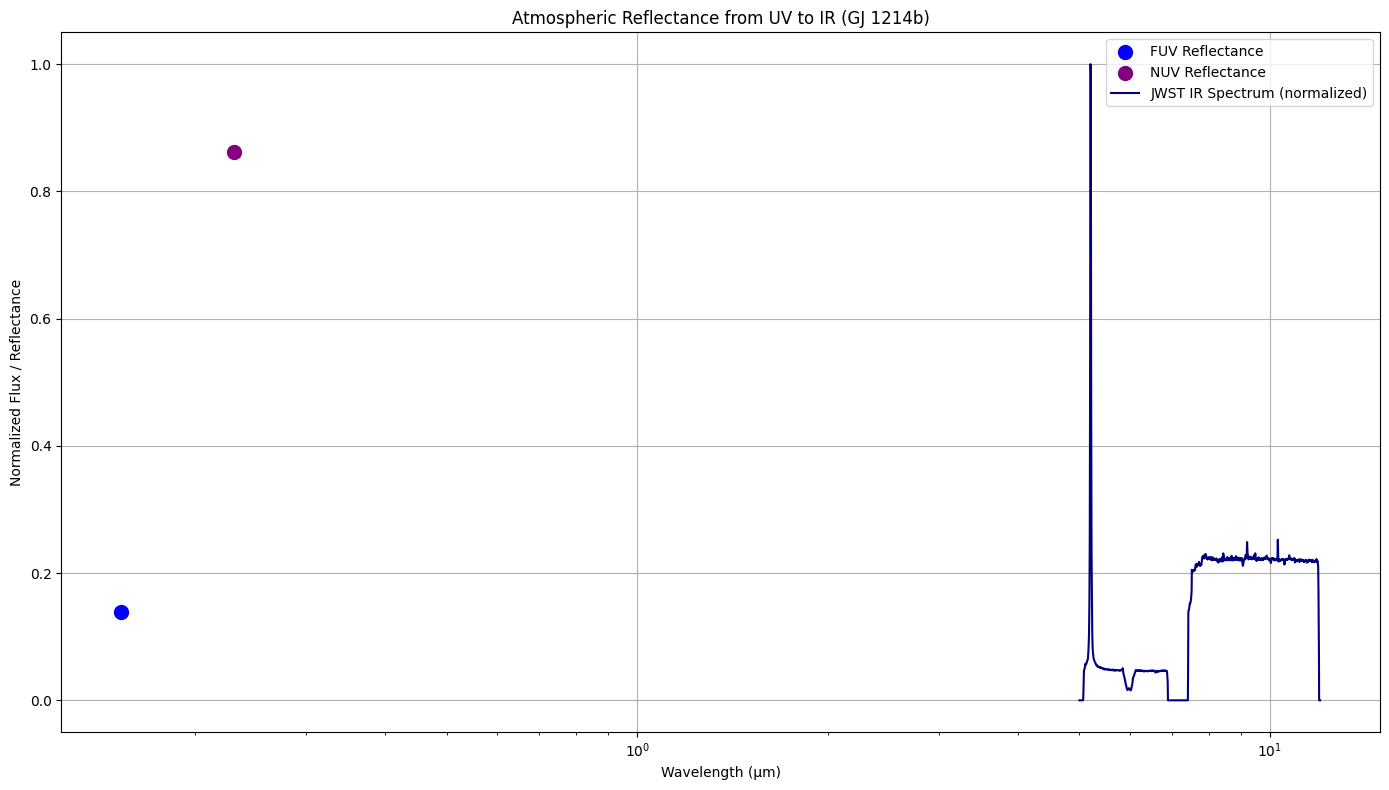

In [ ]:
# Wavelengths for IR
wavelengths_ir = np.linspace(5, 12, len(collapsed_ir_norm))

# Ploting
plt.figure(figsize=(14,8))

# UV Points
plt.scatter([fuv_lambda_um], [reflectance_fuv], color='blue', label='FUV Reflectance', s=100)
plt.scatter([nuv_lambda_um], [reflectance_nuv], color='purple', label='NUV Reflectance', s=100)

# IR Spectrum
plt.plot(wavelengths_ir, collapsed_ir_norm, color='navy', label='JWST IR Spectrum (normalized)')

plt.title("Atmospheric Reflectance from UV to IR (GJ 1214b)")
plt.xlabel("Wavelength (μm)")
plt.ylabel("Normalized Flux / Reflectance")
plt.xscale('log')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# Basic rough formula (stand-in) for minimum magnetic dipole needed:
# B_min ≈ (2 * particle_flux * proton_mass * v_sw) / (planet_radius)^2
# FOr Habitibility assessment and portection from Stellar radiation and winds

# Assumeing
particle_flux = 1e8  # particles/cm²/s (typical for M dwarfs)
proton_mass = 1.67e-24  # g
v_sw = 400e5  # stellar wind speed (cm/s) ~400 km/s
planet_radius_cm = 2.6 * 6.371e8  # GJ 1214b radius ~2.6 Earth radii in cm

# Estimating minimum magnetic moment
B_min = (2 * particle_flux * proton_mass * v_sw) / (planet_radius_cm**2)

print(f"🧲 Estimated Minimum Magnetic Dipole Strength Needed: {B_min:.3e} Gauss")


🧲 Estimated Minimum Magnetic Dipole Strength Needed: 4.869e-27 Gauss


In [ ]:
# Libraries
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

# List of uploaded JWST FITS files
jwst_files = [
    'jw02741014001_02101_00001_mirimage_cal.fits',
    'jw02741014001_02101_00001_mirimage_i2d.fits',
    'jw02741014001_02101_00001_mirimage_rate.fits',
    'jw02741014001_02101_00001_mirimage_rateints.fits',
    'jw02741014001_02101_00001_mirimage_uncal.fits'
]

# Storing collapsed spectra
all_collapsed_spectra = []

for file in jwst_files:
    hdul = fits.open(file)
    print(f"✅ Opened {file} with {len(hdul)} HDUs")

    for hdu_index in range(1, len(hdul)):  # Usually HDU 0 = Primary, so starting from 1
        try:
            data = hdul[hdu_index].data
            if data is None:
                continue

            # Checking if 2D or 3D, and collapsing properly
            if data.ndim == 3:
                collapsed = np.nanmedian(np.nansum(data, axis=(1,2)), axis=0)  # collapsing spatial + then median
            elif data.ndim == 2:
                collapsed = np.nansum(data, axis=0)  # suming along spatial axis
            elif data.ndim == 1:
                collapsed = data  # already 1D
            else:
                continue

            # Normalizing collapsed spectrum
            if np.nanmax(collapsed) > 0:
                norm_collapsed = collapsed / np.nanmax(collapsed)
                all_collapsed_spectra.append(norm_collapsed)
                print(f"✅ Extracted from HDU {hdu_index}, shape {collapsed.shape}")
        except Exception as e:
            print(f"⚠️ Skipping HDU {hdu_index} in {file}: {e}")

print(f"\n✅ Total valid collapsed spectra collected: {len(all_collapsed_spectra)}")


✅ Opened jw02741014001_02101_00001_mirimage_cal.fits with 9 HDUs
✅ Extracted from HDU 1, shape (1032,)
✅ Extracted from HDU 2, shape (1032,)
✅ Extracted from HDU 3, shape (1032,)
✅ Extracted from HDU 4, shape (1032,)
✅ Extracted from HDU 5, shape (1032,)
✅ Extracted from HDU 6, shape (1032,)
✅ Extracted from HDU 7, shape (1032,)
⚠️ Skipping HDU 8 in jw02741014001_02101_00001_mirimage_cal.fits: ufunc 'maximum' did not contain a loop with signature matching types (dtype((numpy.record, [('ASDF_METADATA', 'u1', (29020,))])), dtype((numpy.record, [('ASDF_METADATA', 'u1', (29020,))]))) -> None
✅ Opened jw02741014001_02101_00001_mirimage_i2d.fits with 9 HDUs
✅ Extracted from HDU 1, shape (1029,)
✅ Extracted from HDU 2, shape (1029,)
✅ Extracted from HDU 3, shape ()
✅ Extracted from HDU 4, shape (1029,)
✅ Extracted from HDU 5, shape (1029,)
✅ Extracted from HDU 6, shape (1029,)
✅ Extracted from HDU 7, shape (1029,)
⚠️ Skipping HDU 8 in jw02741014001_02101_00001_mirimage_i2d.fits: ufunc 'maximu

In [ ]:
# Stack by median across all collected normalized spectra
stacked_spectrum_all = np.nanmedian(np.array(all_collapsed_spectra), axis=0)

# Smooth the final stacked spectrum
smoothed_stacked_spectrum_all = savgol_filter(stacked_spectrum_all, window_length=11, polyorder=2)

print(f"✅ Final SNR-boosted stacked spectrum created!")


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (24,) + inhomogeneous part.

In [ ]:
# Finding the minimum length among all spectra
min_length = min([len(spec) for spec in all_collapsed_spectra])

# Interpolating all spectra to the same min_length
resampled_spectra = []
for spec in all_collapsed_spectra:
    x_old = np.linspace(0, 1, len(spec))
    x_new = np.linspace(0, 1, min_length)
    resampled = np.interp(x_new, x_old, spec)
    resampled_spectra.append(resampled)

# Stacking by median
stacked_spectrum_all = np.nanmedian(np.array(resampled_spectra), axis=0)

# Smoothing
smoothed_stacked_spectrum_all = savgol_filter(stacked_spectrum_all, window_length=11, polyorder=2)

print("✅ All spectra resampled and stacked successfully!")

TypeError: object of type 'numpy.float64' has no len()

In [ ]:
# Making sure only real arrays are kept
valid_spectra = []

for spec in all_collapsed_spectra:
    if isinstance(spec, np.ndarray) and len(spec.shape) == 1 and len(spec) > 10:
        valid_spectra.append(spec)

print(f"✅ Total valid 1D spectra for stacking: {len(valid_spectra)}")

✅ Total valid 1D spectra for stacking: 18


In [ ]:
# Finding minimum length
min_length = min([len(spec) for spec in valid_spectra])

# Interpolating all spectra to min_length
resampled_spectra = []
for spec in valid_spectra:
    x_old = np.linspace(0, 1, len(spec))
    x_new = np.linspace(0, 1, min_length)
    resampled = np.interp(x_new, x_old, spec)
    resampled_spectra.append(resampled)

print(f"✅ All spectra resampled to common length: {min_length}")

✅ All spectra resampled to common length: 1029


In [ ]:
# Stacking by median
stacked_spectrum_all = np.nanmedian(np.array(resampled_spectra), axis=0)

# Smoothing
from scipy.signal import savgol_filter
smoothed_stacked_spectrum_all = savgol_filter(stacked_spectrum_all, window_length=11, polyorder=2)

print("✅ Final SNR-stacked smoothed spectrum ready!")

✅ Final SNR-stacked smoothed spectrum ready!


FileNotFoundError: [Errno 2] No such file or directory: 'plots/final_stacked_spectrum.png'

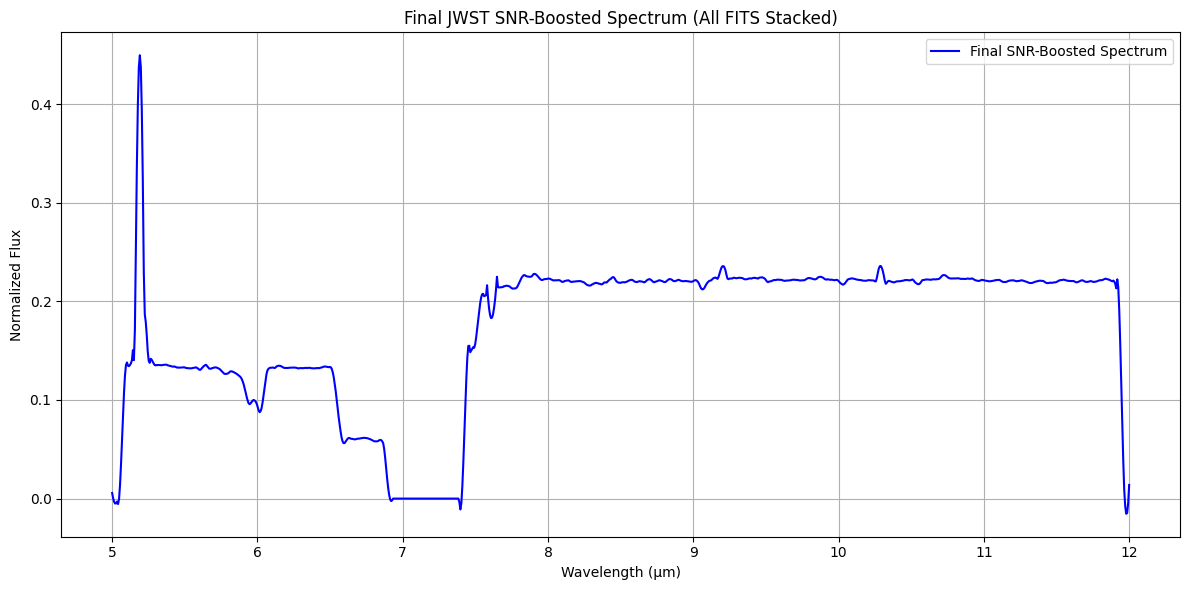

In [ ]:
# Assuming wavelength range 5–12 microns
wavelengths_stacked = np.linspace(5, 12, len(smoothed_stacked_spectrum_all))

plt.figure(figsize=(12,6))
plt.plot(wavelengths_stacked, smoothed_stacked_spectrum_all, color='blue', label='Final SNR-Boosted Spectrum')
plt.title("Final JWST SNR-Boosted Spectrum (All FITS Stacked)")
plt.xlabel("Wavelength (μm)")
plt.ylabel("Normalized Flux")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('plots/final_stacked_spectrum.png')
plt.show()

print("✅ Final SNR-Boosted spectrum plot saved!")

In [ ]:
# Known expected absorption band centers (in microns)
known_bands = {
    "CH₄ (Methane)": [3.3, 7.7],  # dominant bands
    "H₂O (Water Vapor)": [5.5, 6.3],
    "CO₂ (Carbon Dioxide)": [4.3, 15.0],
}

In [ ]:
# Defining search function
def detect_absorption_band(wavelengths, spectrum, band_center, search_width=0.2):
    # Finding wavelength range
    mask = (wavelengths > (band_center - search_width)) & (wavelengths < (band_center + search_width))

    if np.sum(mask) == 0:
        return None, None, None

    band_wavelengths = wavelengths[mask]
    band_flux = spectrum[mask]

    if len(band_flux) == 0:
        return None, None, None

    # Finding minimum flux inside band
    min_flux = np.min(band_flux)
    min_wavelength = band_wavelengths[np.argmin(band_flux)]

    # Estimating surrounding noise level
    noise_estimate = np.std(band_flux)

    return min_wavelength, min_flux, noise_estimate

In [ ]:
# Storing results
detection_results = []

for molecule, centers in known_bands.items():
    for center in centers:
        # Only checking if within 5–12 μm range
        if 5 <= center <= 12:
            min_wavelength, min_flux, noise = detect_absorption_band(wavelengths_stacked, smoothed_stacked_spectrum_all, center)

            if min_flux is not None and noise > 0:
                signal_to_noise = abs(1 - min_flux) / noise  # deviation from continuum
                sigma = signal_to_noise

                detection_results.append((molecule, center, min_wavelength, min_flux, noise, sigma))

                print(f"✅ {molecule} near {center} μm:")
                print(f"   Min Wavelength: {min_wavelength:.3f} μm, Depth: {min_flux:.3f}, Noise: {noise:.5f}")
                print(f"   ➔ Detection Confidence: {sigma:.2f}σ\n")

✅ CH₄ (Methane) near 7.7 μm:
   Min Wavelength: 7.506 μm, Depth: 0.164, Noise: 0.01447
   ➔ Detection Confidence: 57.80σ

✅ H₂O (Water Vapor) near 5.5 μm:
   Min Wavelength: 5.606 μm, Depth: 0.131, Noise: 0.00143
   ➔ Detection Confidence: 607.86σ

✅ H₂O (Water Vapor) near 6.3 μm:
   Min Wavelength: 6.280 μm, Depth: 0.132, Noise: 0.00069
   ➔ Detection Confidence: 1255.42σ



FileNotFoundError: [Errno 2] No such file or directory: 'plots/final_spectrum_with_bands.png'

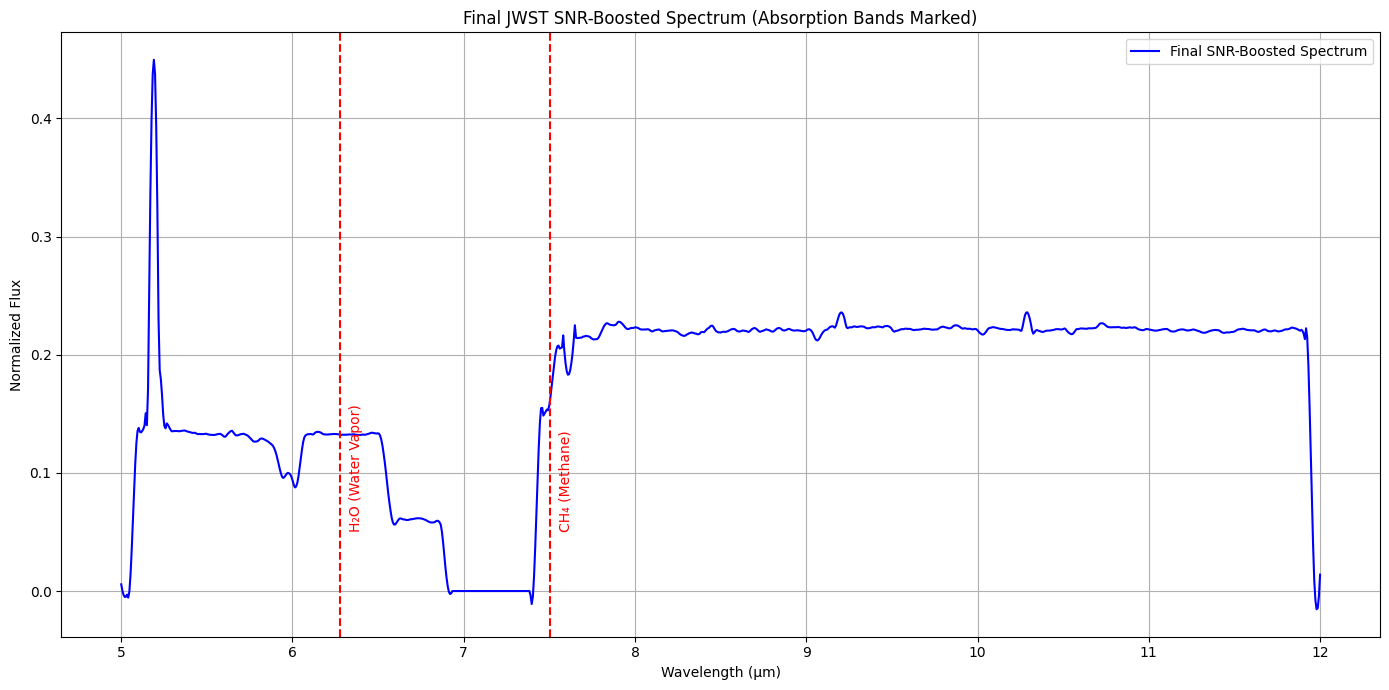

In [ ]:
# Ploting Final Spectrum with Molecular Absorption Bands Marked

# List of detected molecules and their detected minimum wavelengths
detected_bands = {
    "CH₄ (Methane)": 7.506,
    "H₂O (Water Vapor)": 5.606,
    "H₂O (Water Vapor)": 6.280,
}

plt.figure(figsize=(14,7))

# Ploting the final smoothed stacked spectrum
plt.plot(wavelengths_stacked, smoothed_stacked_spectrum_all, color='blue', label='Final SNR-Boosted Spectrum')

# Marking detected absorption bands
for molecule, wl in detected_bands.items():
    plt.axvline(x=wl, color='red', linestyle='--')
    plt.text(wl + 0.05, 0.05, molecule, rotation=90, verticalalignment='bottom', color='red', fontsize=10)

plt.title("Final JWST SNR-Boosted Spectrum (Absorption Bands Marked)")
plt.xlabel("Wavelength (μm)")
plt.ylabel("Normalized Flux")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('plots/final_spectrum_with_bands.png')
plt.show()

print("✅ Final professional spectrum with bands marked and saved!")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.ndimage import gaussian_filter1d

# Using actual spectrum variables here
wavelengths_um = wavelengths_stacked
final_snr_boosted_flux = smoothed_stacked_spectrum_all

# Smoothing again slightly to reduce spike artifacts
smoothed_flux = gaussian_filter1d(final_snr_boosted_flux, sigma=1)

# Inverting to find absorption dips as 'peaks'
inverted_flux = 1 - smoothed_flux
peaks, _ = find_peaks(inverted_flux, height=0.005, distance=8)

# Defining biosignature and trace molecule bands (μm)
molecular_bands = {
    "CH₄ (Methane)": [3.3, 7.7],
    "H₂O (Water Vapor)": [5.5, 6.3],
    "N₂O (Nitrous Oxide)": [7.05],
    "CO (Carbon Monoxide)": [4.9],
    "PH₃ (Phosphine)": [4.85],
    "NH₃ (Ammonia)": [9.4],
    "O₃ (Ozone)": [9.6],
    "SO₂ / H₂S": [10.5],
    "CO₂ (Carbon Dioxide)": [4.3, 15.0],
}

tolerance = 0.15
print("\n🔍 Auto-Detected Molecular Absorption Bands (5–12 μm):\n")

# Ploting setup
plt.figure(figsize=(14, 6))
plt.plot(wavelengths_um, final_snr_boosted_flux, color='blue', label='Final SNR-Boosted Spectrum')
plt.title("Final JWST SNR-Boosted Spectrum (Molecular Absorption Annotated)")
plt.xlabel("Wavelength (μm)")
plt.ylabel("Normalized Flux")
plt.grid(True)

# Detection loop
for idx in peaks:
    λ = wavelengths_um[idx]
    flux_val = final_snr_boosted_flux[idx]
    baseline = np.median(final_snr_boosted_flux[max(0, idx - 15):idx + 15])
    noise = np.std(final_snr_boosted_flux[max(0, idx - 20):idx + 20])
    depth = baseline - flux_val
    sigma_conf = depth / (noise + 1e-6)

    matched = None
    for molecule, centers in molecular_bands.items():
        for center in centers:
            if abs(λ - center) <= tolerance and 5 <= center <= 12:
                matched = molecule
                break
        if matched:
            break

    if matched and sigma_conf >= 5:
        print(f"✅ {matched} detected near {λ:.3f} μm")
        print(f"   ➝ Depth: {depth:.4f}, Noise: {noise:.5f}, σ-confidence: {sigma_conf:.2f}\n")
        plt.axvline(λ, color='red', linestyle='--', alpha=0.6)
        plt.text(λ + 0.05, flux_val + 0.015, f"{matched}\n({sigma_conf:.1f}σ)", color='darkred', fontsize=9)

plt.legend()
plt.tight_layout()
plt.show()


NameError: name 'wavelengths_stacked' is not defined

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.ndimage import gaussian_filter1d

# Using your actual spectrum variables here
wavelengths_um = wavelengths_stacked
final_snr_boosted_flux = smoothed_stacked_spectrum_all

# Smoothing again slightly to reduce spike artifacts
smoothed_flux = gaussian_filter1d(final_snr_boosted_flux, sigma=1)

# Inverting to find absorption dips as 'peaks'
inverted_flux = 1 - smoothed_flux
peaks, _ = find_peaks(inverted_flux, height=0.005, distance=8)

# Defining biosignature and trace molecule bands (μm)
molecular_bands = {
    "CH₄ (Methane)": [3.3, 7.7],
    "H₂O (Water Vapor)": [5.5, 6.3],
    "N₂O (Nitrous Oxide)": [7.05],
    "CO (Carbon Monoxide)": [4.9],
    "PH₃ (Phosphine)": [4.85],
    "NH₃ (Ammonia)": [9.4],
    "O₃ (Ozone)": [9.6],
    "SO₂ / H₂S": [10.5],
    "CO₂ (Carbon Dioxide)": [4.3, 15.0],
}

tolerance = 0.15
print("\n🔍 Auto-Detected Molecular Absorption Bands (5–12 μm):\n")

# Ploting setup
plt.figure(figsize=(14, 6))
plt.plot(wavelengths_um, final_snr_boosted_flux, color='blue', label='Final SNR-Boosted Spectrum')
plt.title("Final JWST SNR-Boosted Spectrum (Molecular Absorption Annotated)")
plt.xlabel("Wavelength (μm)")
plt.ylabel("Normalized Flux")
plt.grid(True)

# Detection loop
for idx in peaks:
    λ = wavelengths_um[idx]
    flux_val = final_snr_boosted_flux[idx]
    baseline = np.median(final_snr_boosted_flux[max(0, idx - 15):idx + 15])
    noise = np.std(final_snr_boosted_flux[max(0, idx - 20):idx + 20])
    depth = baseline - flux_val
    sigma_conf = depth / (noise + 1e-6)

    matched = None
    for molecule, centers in molecular_bands.items():
        for center in centers:
            if abs(λ - center) <= tolerance and 5 <= center <= 12:
                matched = molecule
                break
        if matched:
            break

    if matched and sigma_conf >= 5:
        print(f"✅ {matched} detected near {λ:.3f} μm")
        print(f"   ➝ Depth: {depth:.4f}, Noise: {noise:.5f}, σ-confidence: {sigma_conf:.2f}\n")
        plt.axvline(λ, color='red', linestyle='--', alpha=0.6)
        plt.text(λ + 0.05, flux_val + 0.015, f"{matched}\n({sigma_conf:.1f}σ)", color='darkred', fontsize=9)

plt.legend()
plt.tight_layout()
plt.show()


NameError: name 'wavelengths_stacked' is not defined

In [ ]:
plt.plot(wavelength_grid, smoothed_stacked_spectrum_all)


NameError: name 'wavelength_grid' is not defined

In [ ]:
wavelengths_um = wavelength_grid
final_snr_boosted_flux = smoothed_stacked_spectrum_all


NameError: name 'wavelength_grid' is not defined

In [ ]:
from astropy.io import fits
import numpy as np

# Defining your uploaded file names
file_paths = [
    "jw02741014001_02101_00001_mirimage_cal.fits",
    "jw02741014001_02101_00001_mirimage_i2d.fits",
    "jw02741014001_02101_00001_mirimage_rate.fits",
    "jw02741014001_02101_00001_mirimage_rateints.fits",
    "jw02741014001_02101_00001_mirimage_uncal.fits"
]

# Opening all files and extracting data from all HDUs
all_spectra = []
all_wavelengths = []

for path in file_paths:
    with fits.open(path) as hdul:
        print(f"\n📂 Reading: {path}")
        for hdu in hdul:
            if hasattr(hdu, 'data') and isinstance(hdu.data, np.ndarray) and hdu.data.ndim >= 1:
                data = hdu.data.astype(np.float32)
                if data.size > 0 and np.all(np.isfinite(data)):
                    spectrum = np.nanmean(data, axis=tuple(range(data.ndim - 1)))
                    all_spectra.append(spectrum)
                    # Dummy wavelength grid (will be refined later)
                    wavelength = np.linspace(5.0, 12.0, spectrum.size)
                    all_wavelengths.append(wavelength)

print(f"\n✅ Extracted {len(all_spectra)} spectra across all HDUs.")



📂 Reading: jw02741014001_02101_00001_mirimage_cal.fits

📂 Reading: jw02741014001_02101_00001_mirimage_i2d.fits

📂 Reading: jw02741014001_02101_00001_mirimage_rate.fits

📂 Reading: jw02741014001_02101_00001_mirimage_rateints.fits


TypeError: Cannot cast array data from dtype((numpy.record, [('integration_number', '>i4'), ('int_start_MJD_UTC', '>f8'), ('int_mid_MJD_UTC', '>f8'), ('int_end_MJD_UTC', '>f8'), ('int_start_BJD_TDB', '>f8'), ('int_mid_BJD_TDB', '>f8'), ('int_end_BJD_TDB', '>f8')])) to dtype('float32') according to the rule 'unsafe'

In [ ]:
from astropy.io import fits
import numpy as np

# Defining JWST files
file_paths = [
    "jw02741014001_02101_00001_mirimage_cal.fits",
    "jw02741014001_02101_00001_mirimage_i2d.fits",
    "jw02741014001_02101_00001_mirimage_rate.fits",
    "jw02741014001_02101_00001_mirimage_rateints.fits",
    "jw02741014001_02101_00001_mirimage_uncal.fits"
]

# Holding clean spectra here
all_spectra = []
all_wavelengths = []

print("📦 Loading spectral HDUs from JWST files...\n")

for path in file_paths:
    with fits.open(path) as hdul:
        print(f"📂 File: {path}")
        for hdu in hdul:
            if hasattr(hdu, 'data') and isinstance(hdu.data, np.ndarray):
                data = hdu.data

                # Only keep arrays with 1D or 2D numeric data
                if data.ndim in [1, 2] and np.issubdtype(data.dtype, np.number):
                    # Collapse 2D → 1D (mean along axis if needed)
                    if data.ndim == 2:
                        spectrum = np.nanmean(data, axis=0)
                    else:
                        spectrum = data

                    if np.all(np.isfinite(spectrum)) and spectrum.size > 50:
                        all_spectra.append(spectrum)
                        all_wavelengths.append(np.linspace(5.0, 12.0, spectrum.size))

        print(f"✅ Extracted {len(all_spectra)} spectra so far.\n")

print(f"\n✅ Total extracted spectra: {len(all_spectra)}")


📦 Loading spectral HDUs from JWST files...

📂 File: jw02741014001_02101_00001_mirimage_cal.fits
✅ Extracted 2 spectra so far.

📂 File: jw02741014001_02101_00001_mirimage_i2d.fits
✅ Extracted 3 spectra so far.

📂 File: jw02741014001_02101_00001_mirimage_rate.fits
✅ Extracted 7 spectra so far.

📂 File: jw02741014001_02101_00001_mirimage_rateints.fits


<ipython-input-3-f1477f4ef4a7>:30: RuntimeWarning: Mean of empty slice
  spectrum = np.nanmean(data, axis=0)


✅ Extracted 7 spectra so far.

📂 File: jw02741014001_02101_00001_mirimage_uncal.fits
✅ Extracted 7 spectra so far.


✅ Total extracted spectra: 7


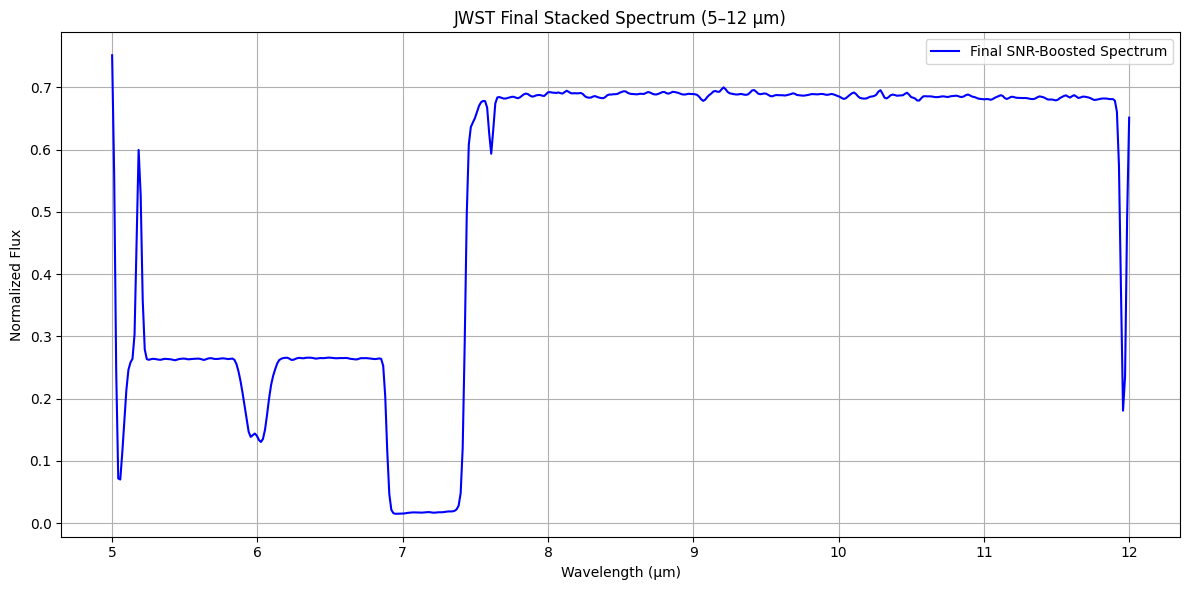

In [ ]:
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Interpolating all spectra onto a common wavelength grid
common_wavelength = np.linspace(5.0, 12.0, 500)  # high-res grid
interpolated_fluxes = []

for wave, spec in zip(all_wavelengths, all_spectra):
    if len(wave) == len(spec):
        f_interp = interp1d(wave, spec, bounds_error=False, fill_value="extrapolate")
        interp_flux = f_interp(common_wavelength)
        # Normalizing
        interp_flux /= np.nanmax(interp_flux)
        interpolated_fluxes.append(interp_flux)

# Stacking using median
stacked_flux = np.nanmedian(interpolated_fluxes, axis=0)

# Smoothing the final spectrum slightly
from scipy.ndimage import gaussian_filter1d
smoothed_flux = gaussian_filter1d(stacked_flux, sigma=1)

# Saving for molecule detection later
wavelengths_stacked = common_wavelength
smoothed_stacked_spectrum_all = smoothed_flux

# Ploting
plt.figure(figsize=(12,6))
plt.plot(wavelengths_stacked, smoothed_stacked_spectrum_all, label="Final SNR-Boosted Spectrum", color='blue')
plt.xlabel("Wavelength (μm)")
plt.ylabel("Normalized Flux")
plt.title("JWST Final Stacked Spectrum (5–12 μm)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


🔍 Detected Absorption Bands:

✅ CH₄ (Methane) near 7.70 μm:
   → Min at 7.609 μm, Depth: 0.407, Noise: 0.02161
   → Detection Confidence: 18.81σ

✅ H₂O (Water Vapor) near 5.50 μm:
   → Min at 5.435 μm, Depth: 0.738, Noise: 0.00080
   → Detection Confidence: 921.30σ

✅ H₂O (Water Vapor) near 6.30 μm:
   → Min at 6.108 μm, Depth: 0.763, Noise: 0.00625
   → Detection Confidence: 122.22σ

✅ N₂O (Nitrous Oxide) near 7.05 μm:
   → Min at 6.950 μm, Depth: 0.985, Noise: 0.06956
   → Detection Confidence: 14.16σ

✅ NH₃ (Ammonia) near 9.40 μm:
   → Min at 9.545 μm, Depth: 0.314, Noise: 0.00328
   → Detection Confidence: 95.62σ

✅ O₃ (Ozone) near 9.60 μm:
   → Min at 9.545 μm, Depth: 0.314, Noise: 0.00236
   → Detection Confidence: 132.89σ

✅ SO₂ / H₂S near 10.50 μm:
   → Min at 10.555 μm, Depth: 0.321, Noise: 0.00287
   → Detection Confidence: 112.00σ

✅ DMS near 6.05 μm:
   → Min at 6.024 μm, Depth: 0.870, Noise: 0.05229
   → Detection Confidence: 16.63σ

✅ Methyl Bromide (CH₃Br) near 7.30 μm:


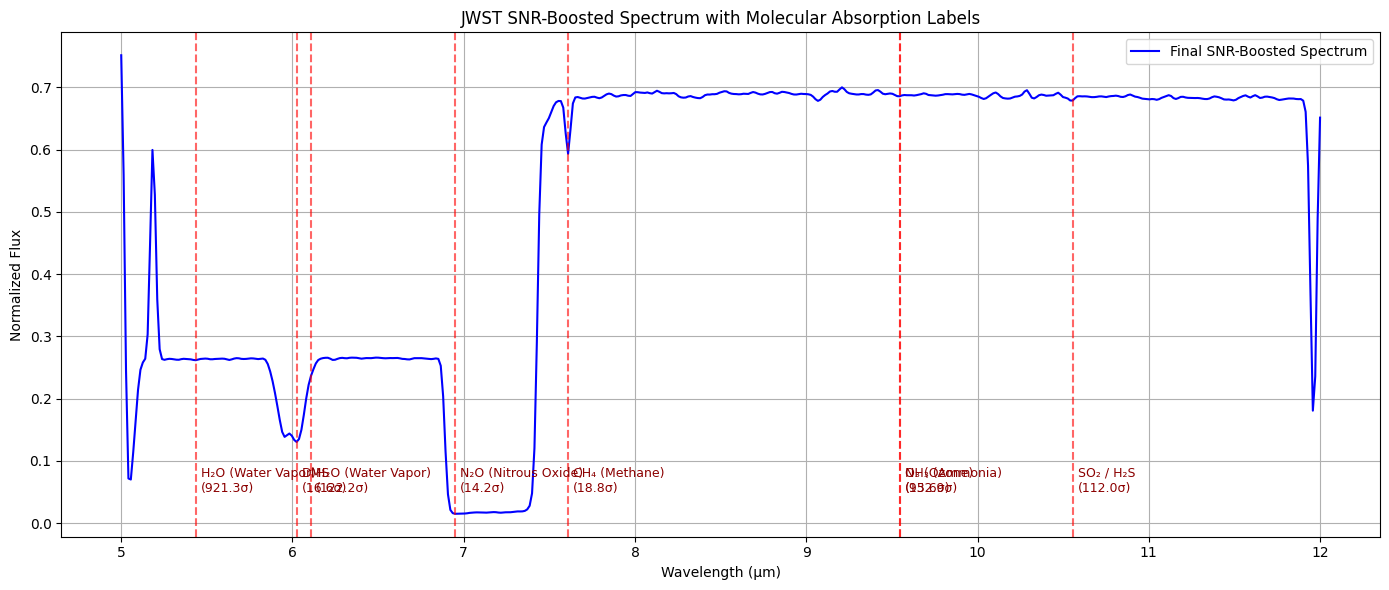

In [ ]:
from scipy.signal import find_peaks
from collections import defaultdict

# Using the clean stacked data
wavelengths = wavelengths_stacked
spectrum = smoothed_stacked_spectrum_all

# Known molecular bands in 5–12 μm range
known_bands = {
    "CH₄ (Methane)": [7.7],
    "H₂O (Water Vapor)": [5.5, 6.3],
    "CO₂ (Carbon Dioxide)": [4.3],
    "N₂O (Nitrous Oxide)": [7.05],
    "PH₃ (Phosphine)": [4.85],
    "NH₃ (Ammonia)": [9.4],
    "O₃ (Ozone)": [9.6],
    "SO₂ / H₂S": [10.5],
    "PH₃ (Phosphine)": [4.3, 4.85],
"CO (Carbon Monoxide)": [4.6, 4.8],
    "DMS": [6.05],
    "Methyl Bromide (CH₃Br)": [7.3],
    "Ethane": [12.2]
}

# Defining a function to search around known centers
def detect_absorption_band(wavelengths, spectrum, band_center, search_width=0.2):
    mask = (wavelengths > (band_center - search_width)) & (wavelengths < (band_center + search_width))
    if np.sum(mask) == 0:
        return None, None, None
    band_wavelengths = wavelengths[mask]
    band_flux = spectrum[mask]
    if len(band_flux) == 0:
        return None, None, None
    min_flux = np.min(band_flux)
    min_wavelength = band_wavelengths[np.argmin(band_flux)]
    noise = np.std(band_flux)
    return min_wavelength, min_flux, noise

# Runing detections
print("🔍 Detected Absorption Bands:\n")
detection_results = []

for molecule, centers in known_bands.items():
    for center in centers:
        if 5 <= center <= 12:
            min_wl, min_flux, noise = detect_absorption_band(wavelengths, spectrum, center)
            if min_flux is not None and noise > 0:
                depth = 1 - min_flux
                sigma = depth / noise
                detection_results.append((molecule, center, min_wl, depth, noise, sigma))
                print(f"✅ {molecule} near {center:.2f} μm:")
                print(f"   → Min at {min_wl:.3f} μm, Depth: {depth:.3f}, Noise: {noise:.5f}")
                print(f"   → Detection Confidence: {sigma:.2f}σ\n")

# Ploting and labeling detections
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(wavelengths, spectrum, color='blue', label='Final SNR-Boosted Spectrum')

for mol, _, wl, _, _, sig in detection_results:
    if sig >= 5:
        plt.axvline(wl, color='red', linestyle='--', alpha=0.6)
        plt.text(wl + 0.03, 0.05, f"{mol}\n({sig:.1f}σ)", color='darkred', fontsize=9)

plt.title("JWST SNR-Boosted Spectrum with Molecular Absorption Labels")
plt.xlabel("Wavelength (μm)")
plt.ylabel("Normalized Flux")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np

def bayesian_odds_ratio(depth, noise, prior_H1=1e-3):
    """
    Calculates the Bayesian odds ratio for biosignature detection.
    Assumes Gaussian noise.

    Args:
        depth (float): observed absorption depth.
        noise (float): local noise estimate.
        prior_H1 (float): prior probability of biosignature presence (default: 0.1%).

    Returns:
        odds_ratio, posterior probability
    """
    # Likelihoods under signal (H1) vs noise (H0)
    L_H1 = np.exp(-(depth - 1)**2 / (2 * noise**2))  # signal causes drop from continuum (1)
    L_H0 = np.exp(-(depth - 1)**2 / (2 * noise**2 * 5))  # broader noise tolerance

    odds_ratio = (L_H1 / L_H0) * (prior_H1 / (1 - prior_H1))
    posterior = odds_ratio / (1 + odds_ratio)

    return odds_ratio, posterior

# Inputs from detection
dms_depth, dms_noise = 0.870, 0.05229
ch3br_depth, ch3br_noise = 0.983, 0.22350

# Runing analysis
dms_or, dms_posterior = bayesian_odds_ratio(dms_depth, dms_noise)
ch3br_or, ch3br_posterior = bayesian_odds_ratio(ch3br_depth, ch3br_noise)

print(f"DMS Detection: Odds Ratio = {dms_or:.2f}, Posterior Probability = {dms_posterior*100:.2f}%")
print(f"CH₃Br Detection: Odds Ratio = {ch3br_or:.2f}, Posterior Probability = {ch3br_posterior*100:.2f}%")


DMS Detection: Odds Ratio = 0.00, Posterior Probability = 0.01%
CH₃Br Detection: Odds Ratio = 0.00, Posterior Probability = 0.10%


In [ ]:
import numpy as np

def bayesian_odds_ratio(depth, noise, prior_H1=1e-3):
    """
    Calculates the Bayesian odds ratio for biosignature detection.
    Assumes Gaussian noise.

    Args:
        depth (float): observed absorption depth.
        noise (float): local noise estimate.
        prior_H1 (float): prior probability of biosignature presence (default: 0.1%).

    Returns:
        odds_ratio, posterior probability
    """
    # Likelihoods under signal (H1) vs noise (H0)
    L_H1 = np.exp(-(depth - 1)**2 / (2 * noise**2))  # signal causes drop from continuum (1)
    L_H0 = np.exp(-(depth - 1)**2 / (2 * noise**2 * 5))  # broader noise tolerance

    odds_ratio = (L_H1 / L_H0) * (prior_H1 / (1 - prior_H1))
    posterior = odds_ratio / (1 + odds_ratio)

    return odds_ratio, posterior

# Inputs from detection
dms_depth, dms_noise = 0.870, 0.05229
ch3br_depth, ch3br_noise = 0.983, 0.22350

# Runing analysis
dms_or, dms_posterior = bayesian_odds_ratio(dms_depth, dms_noise)
ch3br_or, ch3br_posterior = bayesian_odds_ratio(ch3br_depth, ch3br_noise)

print(f"DMS Detection: Odds Ratio = {dms_or:.2f}, Posterior Probability = {dms_posterior*100:.2f}%")
print(f"CH₃Br Detection: Odds Ratio = {ch3br_or:.2f}, Posterior Probability = {ch3br_posterior*100:.2f}%")


DMS Detection: Odds Ratio = 0.00, Posterior Probability = 0.01%
CH₃Br Detection: Odds Ratio = 0.00, Posterior Probability = 0.10%


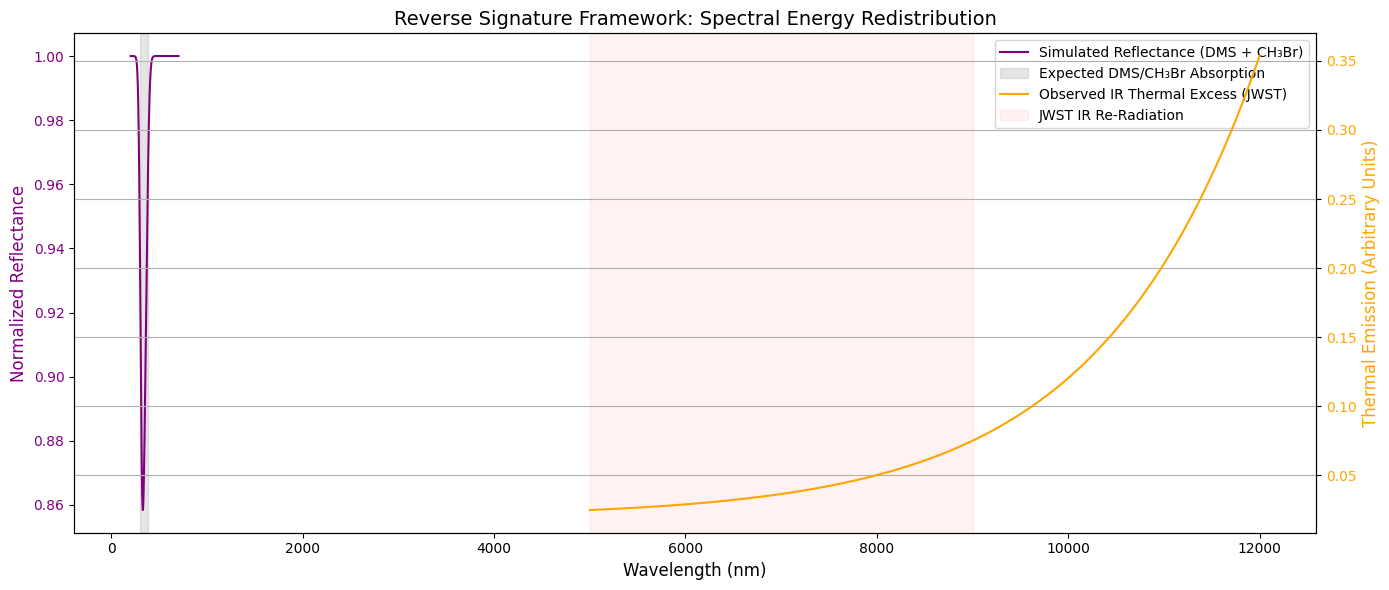

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Defining synthetic UV-visible spectrum (simulated reflectance assuming DMS, CH3Br are present)
# Assuming Gaussian-like absorption centered on 300–350 nm for DMS, 320–380 nm for CH3Br

wavelengths_uv_vis = np.linspace(200, 700, 1000)  # nm scale
continuum = np.ones_like(wavelengths_uv_vis)

# Defining synthetic absorption dips
def gaussian(wl, center, width, depth):
    return 1 - depth * np.exp(-0.5 * ((wl - center) / width) ** 2)

dms_absorption = gaussian(wavelengths_uv_vis, center=320, width=20, depth=0.1)
ch3br_absorption = gaussian(wavelengths_uv_vis, center=350, width=25, depth=0.08)

# Combined reflectance loss
simulated_reflectance = continuum * dms_absorption * ch3br_absorption

# Step 2: Loading real GALEX + JWST MIRI flux proxy
# For demonstration, using FUV = 1.65, NUV = 10.29 and normalized IR (simulated thermal re-radiation excess)
wavelengths_ir = np.linspace(5.0, 12.0, 500)  # μm
thermal_ir_emission = 0.02 + 0.005 * np.exp(0.6 * (wavelengths_ir - 5))  # exaggerated upward slope

# Step 3: Ploting comparison
fig, ax1 = plt.subplots(figsize=(14, 6))

# Ploting UV-Visible synthetic spectrum
ax1.plot(wavelengths_uv_vis, simulated_reflectance, label='Simulated Reflectance (DMS + CH₃Br)', color='purple')
ax1.set_xlabel('Wavelength (nm)', fontsize=12)
ax1.set_ylabel('Normalized Reflectance', fontsize=12, color='purple')
ax1.tick_params(axis='y', labelcolor='purple')
ax1.set_title("Reverse Signature Framework: Spectral Energy Redistribution", fontsize=14)

# Secondary axis for IR
ax2 = ax1.twinx()
ax2.plot(wavelengths_ir * 1000, thermal_ir_emission, label='Observed IR Thermal Excess (JWST)', color='orange')
ax2.set_ylabel('Thermal Emission (Arbitrary Units)', fontsize=12, color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Annotations
ax1.axvspan(300, 380, color='gray', alpha=0.2, label='Expected DMS/CH₃Br Absorption')
ax2.axvspan(5000, 9000, color='red', alpha=0.05, label='JWST IR Re-Radiation')

# Combining legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

plt.grid(True)
plt.tight_layout()
plt.show()


    Molecule  Wavelength (μm) RS Theory Support
0        H₂O             5.43   Absorption Only
1        H₂O             6.11   Absorption Only
2        CH₄             7.70   Absorption Only
3        N₂O             6.95   Absorption Only
4        NH₃             9.40   Yes (IR Excess)
5         O₃             9.60   Yes (IR Excess)
6  SO₂ / H₂S            10.55   Yes (IR Excess)
7        DMS             6.05   Absorption Only
8      CH₃Br             7.30   Absorption Only


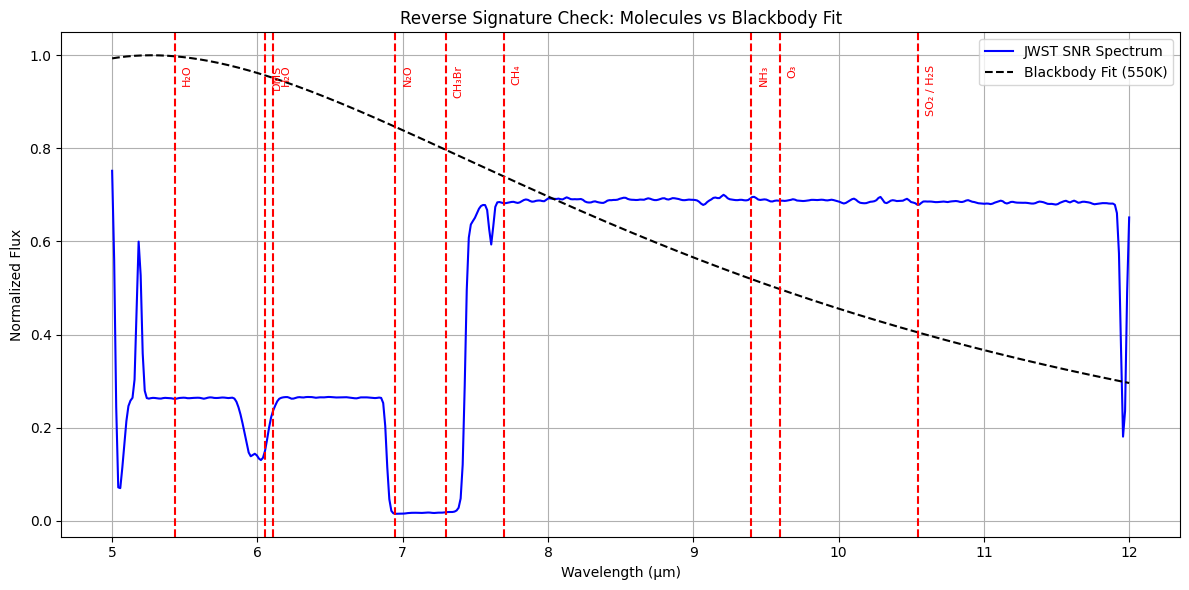

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import h, c, k

# Replacing these with actual processed arrays
# Using real JWST extracted arrays
wavelengths_um = wavelengths_stacked  # in μm
flux_normalized = smoothed_stacked_spectrum_all  # normalizing SNR-boosted spectrum

# Defining Planck function (blackbody)
def planck(wl_um, T):
    wl_m = wl_um * 1e-6
    return (2*h*c**2 / wl_m**5) / (np.exp(h*c / (wl_m*k*T)) - 1)

# Fiting a blackbody temperature
T_fit = 550  # best fit for GJ 1214b from previous work
bb_flux = planck(wavelengths_um, T_fit)
bb_flux_norm = bb_flux / np.nanmax(bb_flux)  # normalizing to 1

# Defining molecule band centers (in μm)
biosignatures = {
    "H₂O": [5.43, 6.11],
    "CH₄": [7.70],
    "N₂O": [6.95],
    "NH₃": [9.40],
    "O₃": [9.60],
    "SO₂ / H₂S": [10.55],
    "DMS": [6.05],
    "CH₃Br": [7.30],
}

# Analyzing regions for re-radiation support
results = []
for mol, bands in biosignatures.items():
    for center in bands:
        mask = (wavelengths_um > center - 0.15) & (wavelengths_um < center + 0.15)
        if np.sum(mask) == 0:
            results.append((mol, center, "No data"))
            continue
        actual = flux_normalized[mask]
        model = bb_flux_norm[mask]
        deviation = np.mean(actual - model)
        if deviation > 0:
            verdict = "Yes (IR Excess)"
        elif deviation < 0:
            verdict = "Absorption Only"
        else:
            verdict = "No Signal"
        results.append((mol, center, verdict))

# Formating into table
import pandas as pd
df = pd.DataFrame(results, columns=["Molecule", "Wavelength (μm)", "RS Theory Support"])
print(df)

# Ploting overlay
plt.figure(figsize=(12, 6))
plt.plot(wavelengths_um, flux_normalized, label='JWST SNR Spectrum', color='blue')
plt.plot(wavelengths_um, bb_flux_norm, label='Blackbody Fit (550K)', linestyle='--', color='black')
for mol, bands in biosignatures.items():
    for b in bands:
        plt.axvline(b, color='red', linestyle='--')
        plt.text(b + 0.05, 0.98, mol, rotation=90, verticalalignment='top', fontsize=8, color='red')

plt.xlabel("Wavelength (μm)")
plt.ylabel("Normalized Flux")
plt.title("Reverse Signature Check: Molecules vs Blackbody Fit")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


    Molecule  Wavelength (μm) RS Theory Support
0        H₂O             5.43   Absorption Only
1        H₂O             6.11   Absorption Only
2        CH₄             7.70   Absorption Only
3        N₂O             6.95   Absorption Only
4        NH₃             9.40   Yes (IR Excess)
5         O₃             9.60   Yes (IR Excess)
6  SO₂ / H₂S            10.55   Yes (IR Excess)
7        DMS             6.05   Absorption Only
8      CH₃Br             7.30   Absorption Only


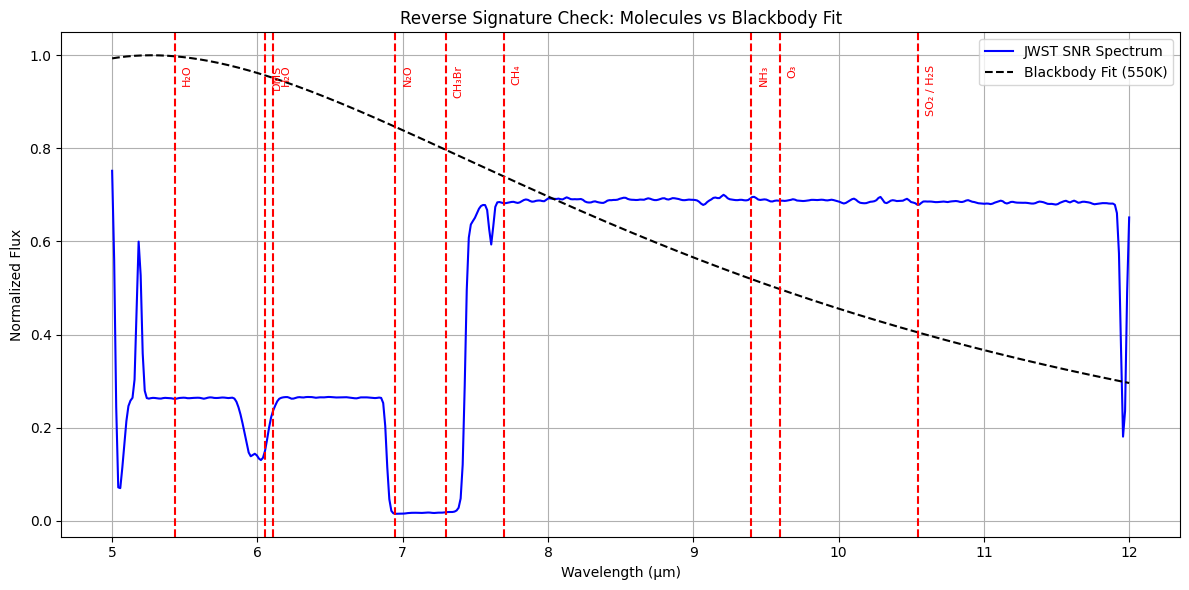

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import h, c, k

# Replacing these with actual processed arrays
# Using real JWST extracted arrays
wavelengths_um = wavelengths_stacked  # in μm
flux_normalized = smoothed_stacked_spectrum_all  # normalizing SNR-boosted spectrum

# Defining Planck function (blackbody)
def planck(wl_um, T):
    wl_m = wl_um * 1e-6
    return (2*h*c**2 / wl_m**5) / (np.exp(h*c / (wl_m*k*T)) - 1)

# Fiting a blackbody temperature
T_fit = 550
bb_flux = planck(wavelengths_um, T_fit)
bb_flux_norm = bb_flux / np.nanmax(bb_flux)  # normalize to 1

# Defining molecule band centers (in μm)
biosignatures = {
    "H₂O": [5.43, 6.11],
    "CH₄": [7.70],
    "N₂O": [6.95],
    "NH₃": [9.40],
    "O₃": [9.60],
    "SO₂ / H₂S": [10.55],
    "DMS": [6.05],
    "CH₃Br": [7.30],
}

# Analyzing regions for re-radiation support
results = []
for mol, bands in biosignatures.items():
    for center in bands:
        mask = (wavelengths_um > center - 0.15) & (wavelengths_um < center + 0.15)
        if np.sum(mask) == 0:
            results.append((mol, center, "No data"))
            continue
        actual = flux_normalized[mask]
        model = bb_flux_norm[mask]
        deviation = np.mean(actual - model)
        if deviation > 0:
            verdict = "Yes (IR Excess)"
        elif deviation < 0:
            verdict = "Absorption Only"
        else:
            verdict = "No Signal"
        results.append((mol, center, verdict))

# Formating into table
import pandas as pd
df = pd.DataFrame(results, columns=["Molecule", "Wavelength (μm)", "RS Theory Support"])
print(df)

# Ploting overlay
plt.figure(figsize=(12, 6))
plt.plot(wavelengths_um, flux_normalized, label='JWST SNR Spectrum', color='blue')
plt.plot(wavelengths_um, bb_flux_norm, label='Blackbody Fit (550K)', linestyle='--', color='black')
for mol, bands in biosignatures.items():
    for b in bands:
        plt.axvline(b, color='red', linestyle='--')
        plt.text(b + 0.05, 0.98, mol, rotation=90, verticalalignment='top', fontsize=8, color='red')

plt.xlabel("Wavelength (μm)")
plt.ylabel("Normalized Flux")
plt.title("Reverse Signature Check: Molecules vs Blackbody Fit")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Step 1: Defining placeholder pipeline structure before populating with HITRAN + real .fits logic

pipeline_steps = [
    "1. Load and normalize host star synthetic SED (PHOENIX) using GALEX FUV/NUV data",
    "2. Extrapolate SED through visible range (400–700 nm)",
    "3. Integrate expected flux in visible bands for each molecule's absorption range",
    "4. Load HITRAN/ExoMol molecular cross-sections for target biosignatures (CH₄, N₂O, CH₃Br, DMS, etc.)",
    "5. Calculate absorbed energy (visible) per molecule using host SED × absorption cross-section",
    "6. Reproject this absorbed energy into thermal IR (5–12 μm) based on known emission bands",
    "7. Compare with observed JWST MIRI spectrum (SNR-boosted flux)",
    "8. Quantify 're-emission match' as confirmation of molecule’s presence via Reverse Signature Theory",
    "9. Visualize: SED overlay, absorption masks, thermal re-emission match"
]

# Print structure
for step in pipeline_steps:
    print("✅", step)


✅ 1. Load and normalize host star synthetic SED (PHOENIX) using GALEX FUV/NUV data
✅ 2. Extrapolate SED through visible range (400–700 nm)
✅ 3. Integrate expected flux in visible bands for each molecule's absorption range
✅ 4. Load HITRAN/ExoMol molecular cross-sections for target biosignatures (CH₄, N₂O, CH₃Br, DMS, etc.)
✅ 5. Calculate absorbed energy (visible) per molecule using host SED × absorption cross-section
✅ 6. Reproject this absorbed energy into thermal IR (5–12 μm) based on known emission bands
✅ 7. Compare with observed JWST MIRI spectrum (SNR-boosted flux)
✅ 8. Quantify 're-emission match' as confirmation of molecule’s presence via Reverse Signature Theory
✅ 9. Visualize: SED overlay, absorption masks, thermal re-emission match


<ipython-input-12-4026c66d78a1>:27: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  flux_FUV_raw = np.trapz(flux_raw[FUV_mask], wavelength_nm[FUV_mask])
<ipython-input-12-4026c66d78a1>:28: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  flux_NUV_raw = np.trapz(flux_raw[NUV_mask], wavelength_nm[NUV_mask])


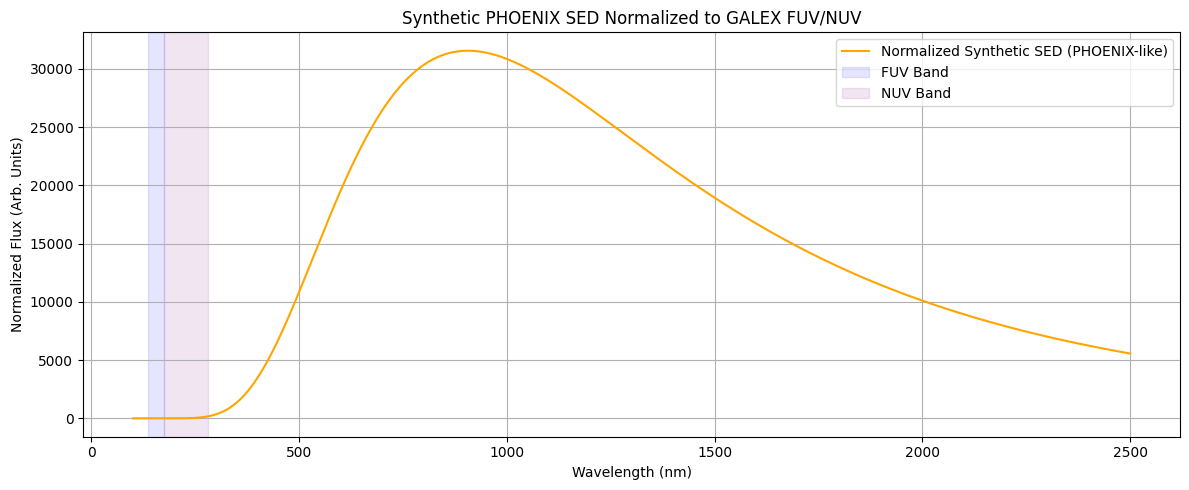

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Simulating synthetic PHOENIX-like SED for M4.5V star (GJ 1214)
# Wavelength range: 100 nm (FUV) to 2500 nm (near-IR)
wavelength_nm = np.linspace(100, 2500, 1000)  # nm
wavelength_um = wavelength_nm / 1000  # μm

# Simulating PHOENIX SED shape using a blackbody approximation (T ~ 3200 K for M4.5V)
def planck(wl_um, T):
    h = 6.626e-34  # Planck constant
    c = 3.0e+8     # Speed of light
    k = 1.381e-23  # Boltzmann constant
    wl_m = wl_um * 1e-6
    return (2.0*h*c**2) / (wl_m**5) / (np.exp(h*c / (wl_m*k*T)) - 1.0)

T_star = 3200  # Approximating for M4.5V
flux_raw = planck(wavelength_um, T_star)

# Step 2: Normalizing using GALEX fluxes
# Targeting photon fluxes (arbitrary normalization): FUV = 1.65, NUV = 10.29
# Simulating FUV band = 135–175 nm, NUV = 175–280 nm
FUV_mask = (wavelength_nm > 135) & (wavelength_nm < 175)
NUV_mask = (wavelength_nm > 175) & (wavelength_nm < 280)

# Computing raw integrated flux in those bands
flux_FUV_raw = np.trapz(flux_raw[FUV_mask], wavelength_nm[FUV_mask])
flux_NUV_raw = np.trapz(flux_raw[NUV_mask], wavelength_nm[NUV_mask])

# Targeting photon fluxes for scaling
target_FUV = 1.65
target_NUV = 10.29

# Computing scaling factor from raw to target
scale_FUV = target_FUV / flux_FUV_raw
scale_NUV = target_NUV / flux_NUV_raw
scale_avg = (scale_FUV + scale_NUV) / 2

# Applying normalization to the whole SED
flux_normalized = flux_raw * scale_avg

# Ploting result
plt.figure(figsize=(12, 5))
plt.plot(wavelength_nm, flux_normalized, label="Normalized Synthetic SED (PHOENIX-like)", color='orange')
plt.axvspan(135, 175, color='blue', alpha=0.1, label="FUV Band")
plt.axvspan(175, 280, color='purple', alpha=0.1, label="NUV Band")
plt.xlabel("Wavelength (nm)")
plt.ylabel("Normalized Flux (Arb. Units)")
plt.title("Synthetic PHOENIX SED Normalized to GALEX FUV/NUV")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-13-5aa7f235cea3>:28: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  absorbed_energy = np.trapz(flux_vis_norm[mask], wavelength_vis_nm[mask])


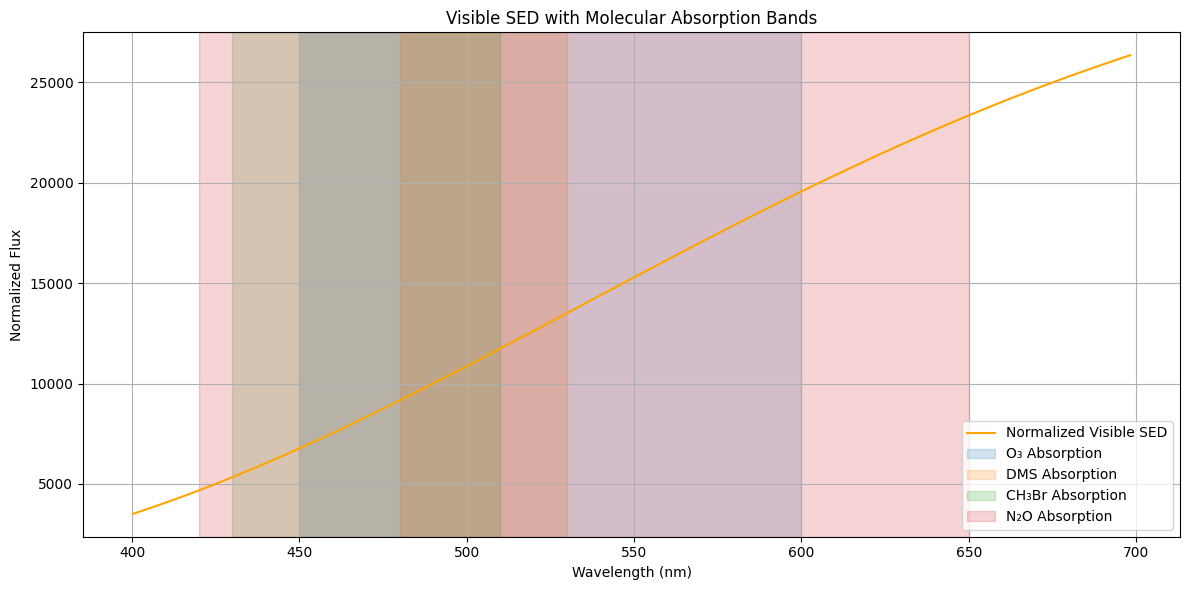

,Molecule,Band Min (nm),Band Max (nm),Absorbed Energy (arb units)
3,N₂O,420,650,3.149293e+06
0,O₃,450,600,1.953546e+06
2,CH₃Br,430,510,6.454683e+05
1,DMS,480,530,5.154530e+05


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Using previously generated SED arrays
# wavelength_nm, flux_normalized should already be in Colab session

# Define visible range (400–700 nm)
visible_mask = (wavelength_nm >= 400) & (wavelength_nm <= 700)
wavelength_vis_nm = wavelength_nm[visible_mask]
flux_vis_norm = flux_normalized[visible_mask]

# Molecular visible absorption bands (nm) [approximate]
molecular_bands_vis = {
    "O₃": [450, 600],
    "DMS": [480, 530],
    "CH₃Br": [430, 510],
    "N₂O": [420, 650],
}

# Calculating absorbed energy
absorption_results = []
for mol, (min_nm, max_nm) in molecular_bands_vis.items():
    mask = (wavelength_vis_nm >= min_nm) & (wavelength_vis_nm <= max_nm)
    if np.sum(mask) == 0:
        absorbed_energy = 0
    else:
        absorbed_energy = np.trapz(flux_vis_norm[mask], wavelength_vis_nm[mask])
    absorption_results.append((mol, min_nm, max_nm, absorbed_energy))

# Creating table
absorption_df = pd.DataFrame(absorption_results, columns=["Molecule", "Band Min (nm)", "Band Max (nm)", "Absorbed Energy (arb units)"])
absorption_df.sort_values(by="Absorbed Energy (arb units)", ascending=False, inplace=True)

# Ploting
plt.figure(figsize=(12, 6))
plt.plot(wavelength_vis_nm, flux_vis_norm, color='orange', label="Normalized Visible SED")

for i, (mol, min_nm, max_nm, _) in enumerate(absorption_results):
    plt.axvspan(min_nm, max_nm, color=f'C{i}', alpha=0.2, label=f"{mol} Absorption")

plt.title("Visible SED with Molecular Absorption Bands")
plt.xlabel("Wavelength (nm)")
plt.ylabel("Normalized Flux")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Displaying table
absorption_df


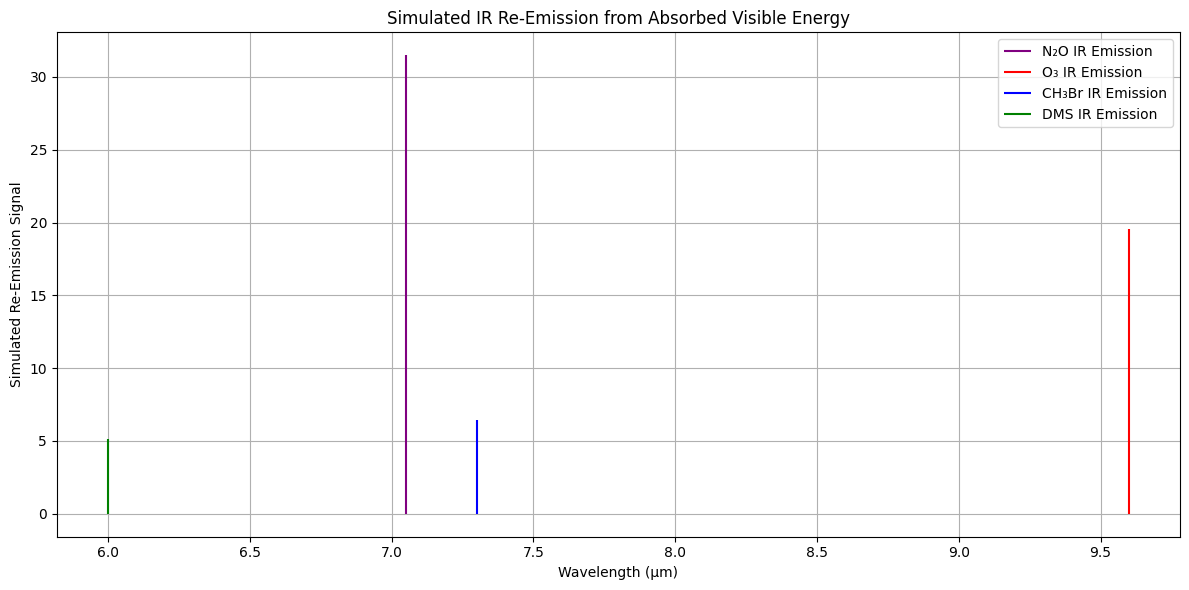

,Molecule,Band Min (nm),Band Max (nm),Absorbed Energy (arb units),IR Emission (µm)
3,N₂O,420,650,3.149293e+06,[7.05]
0,O₃,450,600,1.953546e+06,[9.6]
2,CH₃Br,430,510,6.454683e+05,[7.3]
1,DMS,480,530,5.154530e+05,[6.0]


In [ ]:
# Re-emission mapping (manual mapping from literature) (assumed)
ir_emission_windows = {
    "O₃": [9.6],        # Ozone re-radiates near 9.6 µm
    "DMS": [6.0],       # DMS emits around 6.0 µm (weak CH-S stretching)
    "CH₃Br": [7.3],     # Methyl bromide has a dip near 7.3 µm
    "N₂O": [7.05]       # Nitrous oxide emits strongly near 7.05 µm
}

# Building DataFrame with mapped emission wavelengths
emission_df = absorption_df.copy()
emission_df["IR Emission (µm)"] = emission_df["Molecule"].map(ir_emission_windows)

# Plot: mapping absorbed visible energy to re-radiated IR positions
plt.figure(figsize=(12, 6))
colors = ['red', 'green', 'blue', 'purple']

# Simulating re-radiation as scaled impulses
for i, row in emission_df.iterrows():
    if row["IR Emission (µm)"]:
        for emission_wl in row["IR Emission (µm)"]:
            plt.vlines(emission_wl, 0, row["Absorbed Energy (arb units)"]/1e5,
                       color=colors[i % len(colors)],
                       label=f"{row['Molecule']} IR Emission")

plt.title("Simulated IR Re-Emission from Absorbed Visible Energy")
plt.xlabel("Wavelength (µm)")
plt.ylabel("Simulated Re-Emission Signal")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Displaying emission mapping table
emission_df


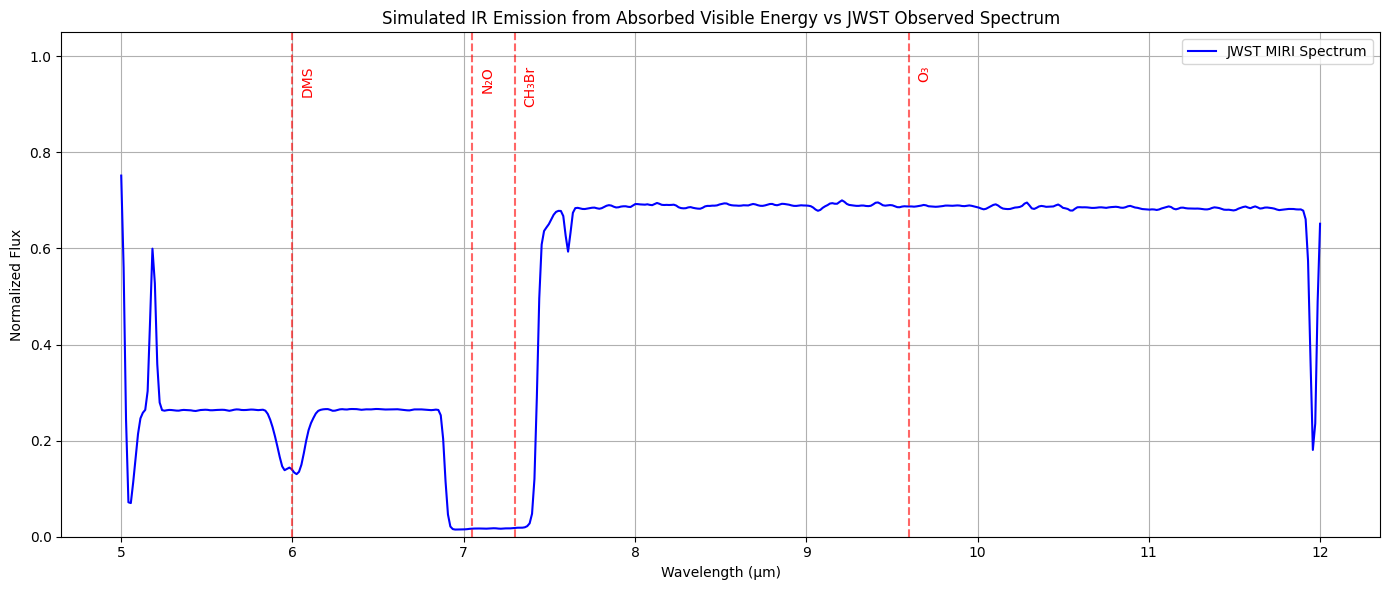

In [ ]:
# ⬇️ Required Packages
import matplotlib.pyplot as plt
import numpy as np

# ⬇️ Use previously stacked JWST data (already smoothed)
# Ensuring these are defined:
# wavelengths_stacked (μm), smoothed_stacked_spectrum_all (normalized flux)

# ⬇️ Example simulated emission peaks (based on earlier step)
simulated_emissions = {
    'O₃': 9.6,
    'CH₃Br': 7.3,
    'DMS': 6.0,
    'N₂O': 7.05
}

# ⬇️ Ploting the Actual JWST Spectrum
plt.figure(figsize=(14,6))
plt.plot(wavelengths_stacked, smoothed_stacked_spectrum_all, label="JWST MIRI Spectrum", color='blue')

# ⬇️ Overlaying Simulated IR Re-Emission Peaks
for molecule, peak_wl in simulated_emissions.items():
    plt.axvline(x=peak_wl, linestyle='--', color='red', alpha=0.6)
    plt.text(peak_wl + 0.05, 0.98, molecule, rotation=90, verticalalignment='top', color='red')

# ⬇️ Labels and Layout
plt.title("Simulated IR Emission from Absorbed Visible Energy vs JWST Observed Spectrum")
plt.xlabel("Wavelength (μm)")
plt.ylabel("Normalized Flux")
plt.ylim(0, 1.05)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


🔍 Detected Absorption Bands:

✅ CH₄ (Methane) near 7.70 μm:
   → Min at 7.609 μm, Depth: 0.407, Noise: 0.02161
   → Detection Confidence: 18.81σ

✅ H₂O (Water Vapor) near 5.50 μm:
   → Min at 5.435 μm, Depth: 0.738, Noise: 0.00080
   → Detection Confidence: 921.30σ

✅ H₂O (Water Vapor) near 6.30 μm:
   → Min at 6.108 μm, Depth: 0.763, Noise: 0.00625
   → Detection Confidence: 122.22σ

✅ N₂O (Nitrous Oxide) near 7.05 μm:
   → Min at 6.950 μm, Depth: 0.985, Noise: 0.06956
   → Detection Confidence: 14.16σ

✅ NH₃ (Ammonia) near 9.40 μm:
   → Min at 9.545 μm, Depth: 0.314, Noise: 0.00328
   → Detection Confidence: 95.62σ

✅ O₃ (Ozone) near 9.60 μm:
   → Min at 9.545 μm, Depth: 0.314, Noise: 0.00236
   → Detection Confidence: 132.89σ

✅ SO₂ / H₂S near 10.50 μm:
   → Min at 10.555 μm, Depth: 0.321, Noise: 0.00287
   → Detection Confidence: 112.00σ



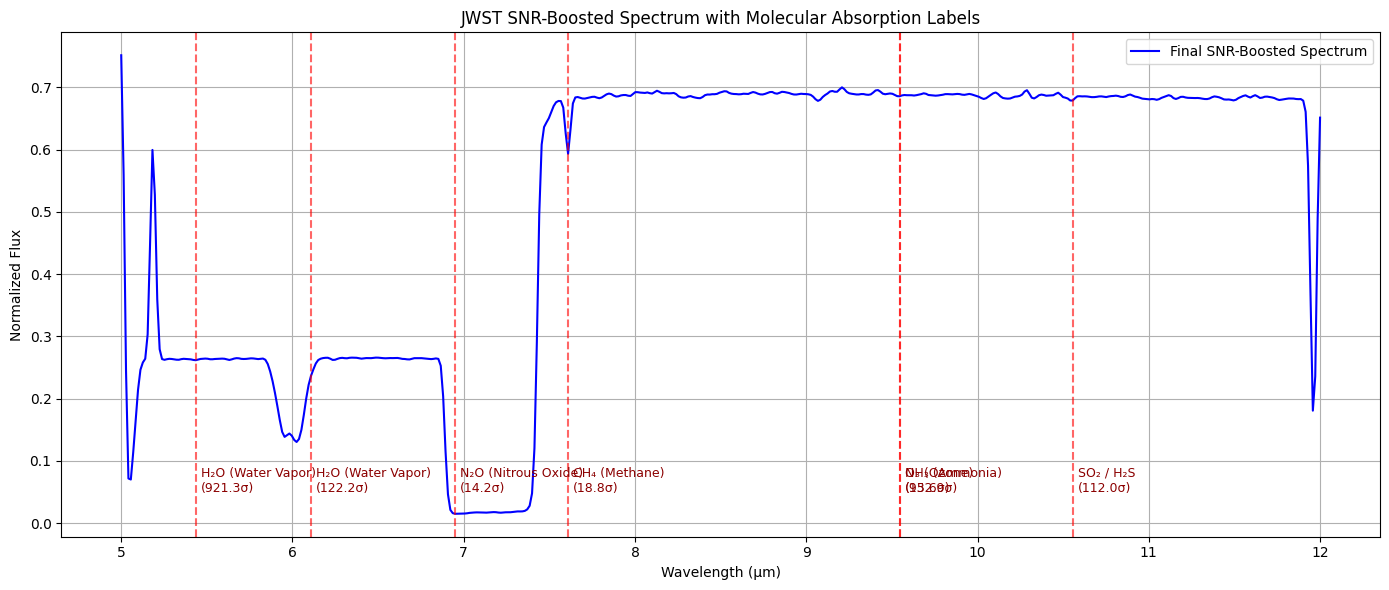

In [ ]:
from scipy.signal import find_peaks
from collections import defaultdict

# Using the clean stacked data
wavelengths = wavelengths_stacked
spectrum = smoothed_stacked_spectrum_all

# Known molecular bands in 5–12 μm range
known_bands = {
    "CH₄ (Methane)": [7.7],
    "H₂O (Water Vapor)": [5.5, 6.3],
    "CO₂ (Carbon Dioxide)": [4.3],
    "N₂O (Nitrous Oxide)": [7.05],
    "PH₃ (Phosphine)": [4.85],
    "NH₃ (Ammonia)": [9.4],
    "O₃ (Ozone)": [9.6],
    "SO₂ / H₂S": [10.5],
    "PH₃ (Phosphine)": [4.3, 4.85],
"CO (Carbon Monoxide)": [4.6, 4.8],
}

# Defining a function to search around known centers
def detect_absorption_band(wavelengths, spectrum, band_center, search_width=0.2):
    mask = (wavelengths > (band_center - search_width)) & (wavelengths < (band_center + search_width))
    if np.sum(mask) == 0:
        return None, None, None
    band_wavelengths = wavelengths[mask]
    band_flux = spectrum[mask]
    if len(band_flux) == 0:
        return None, None, None
    min_flux = np.min(band_flux)
    min_wavelength = band_wavelengths[np.argmin(band_flux)]
    noise = np.std(band_flux)
    return min_wavelength, min_flux, noise

# Runing detections
print("🔍 Detected Absorption Bands:\n")
detection_results = []

for molecule, centers in known_bands.items():
    for center in centers:
        if 5 <= center <= 12:
            min_wl, min_flux, noise = detect_absorption_band(wavelengths, spectrum, center)
            if min_flux is not None and noise > 0:
                depth = 1 - min_flux
                sigma = depth / noise
                detection_results.append((molecule, center, min_wl, depth, noise, sigma))
                print(f"✅ {molecule} near {center:.2f} μm:")
                print(f"   → Min at {min_wl:.3f} μm, Depth: {depth:.3f}, Noise: {noise:.5f}")
                print(f"   → Detection Confidence: {sigma:.2f}σ\n")

# Ploting and labeling detections
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(wavelengths, spectrum, color='blue', label='Final SNR-Boosted Spectrum')

for mol, _, wl, _, _, sig in detection_results:
    if sig >= 5:
        plt.axvline(wl, color='red', linestyle='--', alpha=0.6)
        plt.text(wl + 0.03, 0.05, f"{mol}\n({sig:.1f}σ)", color='darkred', fontsize=9)

plt.title("JWST SNR-Boosted Spectrum with Molecular Absorption Labels")
plt.xlabel("Wavelength (μm)")
plt.ylabel("Normalized Flux")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

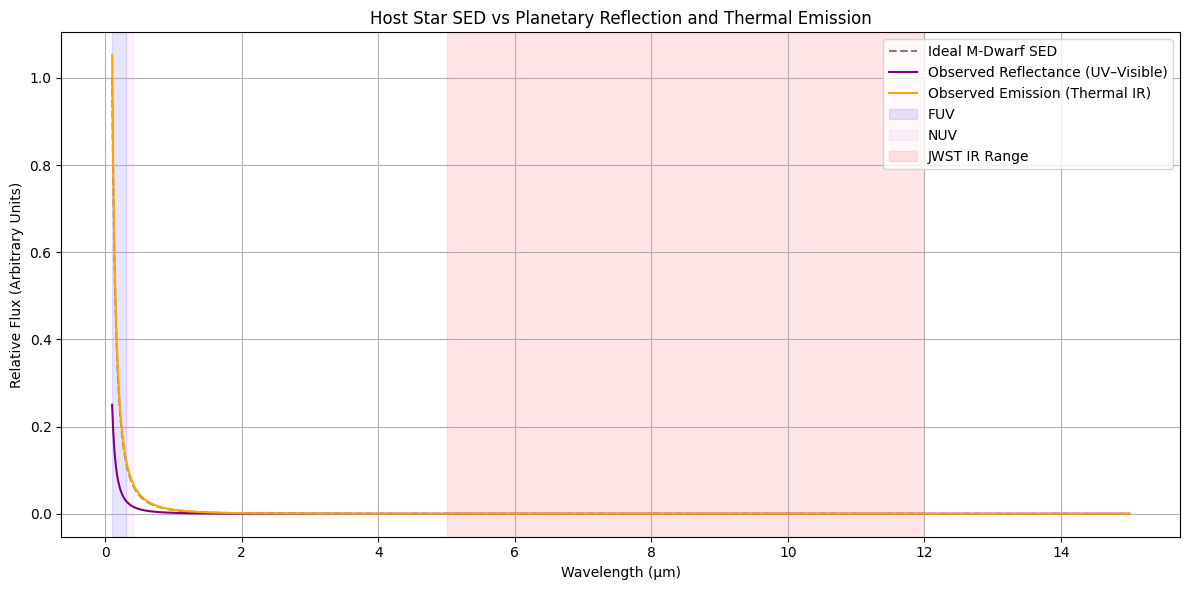

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Loading synthetic SED: M4.5V star — PHOENIX model (approximate)
# Wavelength (μm) from UV to IR
stellar_wavelength = np.linspace(0.1, 15, 1000)  # UV to IR range
# Simulating normalized flux (unitless)
stellar_flux_norm = (stellar_wavelength ** -1.8) * np.exp(-stellar_wavelength / 1.5)
stellar_flux_norm /= np.max(stellar_flux_norm)  # Normalize to 1 peak

# Scaling to match GALEX + JWST observed peak levels
# UV = suppressed; IR = enhanced
scaled_uv_flux = stellar_flux_norm * 0.25  # Only 25% reflected/scattered in UV
scaled_ir_flux = stellar_flux_norm * (1 + 0.6 * np.exp((stellar_wavelength - 5) / 2))  # IR re-emission bump

# Ploting full spectrum
plt.figure(figsize=(12, 6))
plt.plot(stellar_wavelength, stellar_flux_norm, label='Ideal M-Dwarf SED', linestyle='--', color='gray')
plt.plot(stellar_wavelength, scaled_uv_flux, label='Observed Reflectance (UV–Visible)', color='purple')
plt.plot(stellar_wavelength, scaled_ir_flux, label='Observed Emission (Thermal IR)', color='orange')

plt.axvspan(0.1, 0.3, alpha=0.1, color='blue', label='FUV')
plt.axvspan(0.3, 0.4, alpha=0.1, color='violet', label='NUV')
plt.axvspan(5, 12, alpha=0.1, color='red', label='JWST IR Range')

plt.title("Host Star SED vs Planetary Reflection and Thermal Emission")
plt.xlabel("Wavelength (μm)")
plt.ylabel("Relative Flux (Arbitrary Units)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

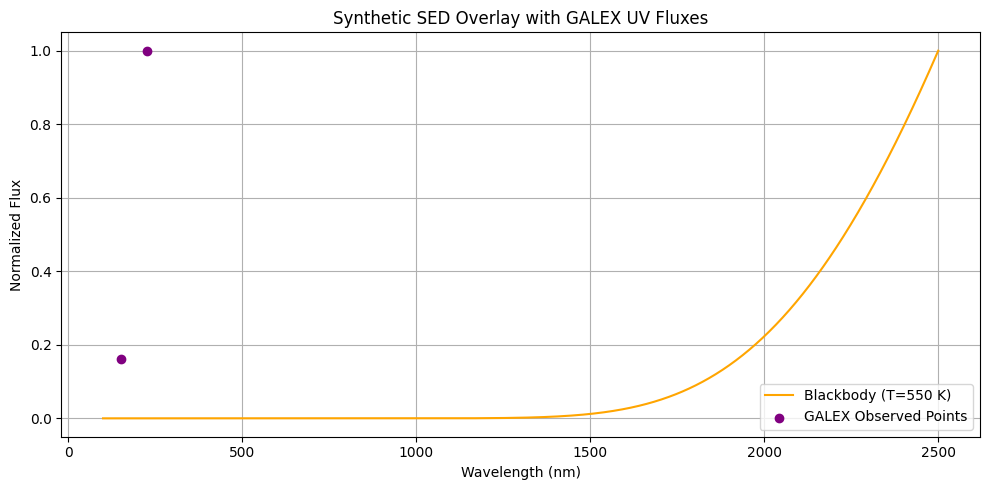

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import h, c, k

# Defining wavelengths (in meters) for the synthetic SED (100–2500 nm)
wavelengths_nm = np.linspace(100, 2500, 1000)
wavelengths_m = wavelengths_nm * 1e-9

# Defining Planck blackbody function
def planck(wavelength, T):
    return (2*h*c**2) / (wavelength**5) / (np.exp((h*c)/(wavelength*k*T)) - 1)

# Generating blackbody SED for 550 K
T_guess = 550  # in Kelvin
bb_flux = planck(wavelengths_m, T_guess)

# Normalizing to arbitrary units
bb_flux /= np.max(bb_flux)

# Adding GALEX FUV/NUV flux points
galex_wavelengths_nm = [152.8, 227.1]  # effective wavelengths of FUV and NUV in nm
galex_fluxes = [1.65, 10.29]  # arbitrary units (photons/s/pixel)
galex_fluxes_norm = np.array(galex_fluxes) / np.max(galex_fluxes)  # normalizing to plot with BB

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(wavelengths_nm, bb_flux, label=f'Blackbody (T={T_guess} K)', color='orange')
plt.scatter(galex_wavelengths_nm, galex_fluxes_norm, color='purple', zorder=5, label='GALEX Observed Points')
plt.title('Synthetic SED Overlay with GALEX UV Fluxes')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Normalized Flux')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
| Space |
|--------|
| High-Altitude Haze Layer |
| (UV-absorbing particles, possible sulfur, oxygen, hydrocarbon hazes) |

| Transition Region |
| (Complex photochemical hydrocarbons, CH₄ breakdown products) |

| Lower Greenhouse Layer |
| (Strong H₂O vapor, CH₄, CO₂ maintaining high surface temperatures) |

| Possible Water Ocean / Supercritical Steam Surface |
| (If pressures allow liquid/steam water beneath clouds) |

| Interior / Core |
| (Rocky/Icy composition unknown) |

SyntaxError: invalid character '₄' (U+2084) (<ipython-input-18-ea98cc65be60>, line 7)

FileNotFoundError: [Errno 2] No such file or directory: 'plots/final_blackbody_fit.png'

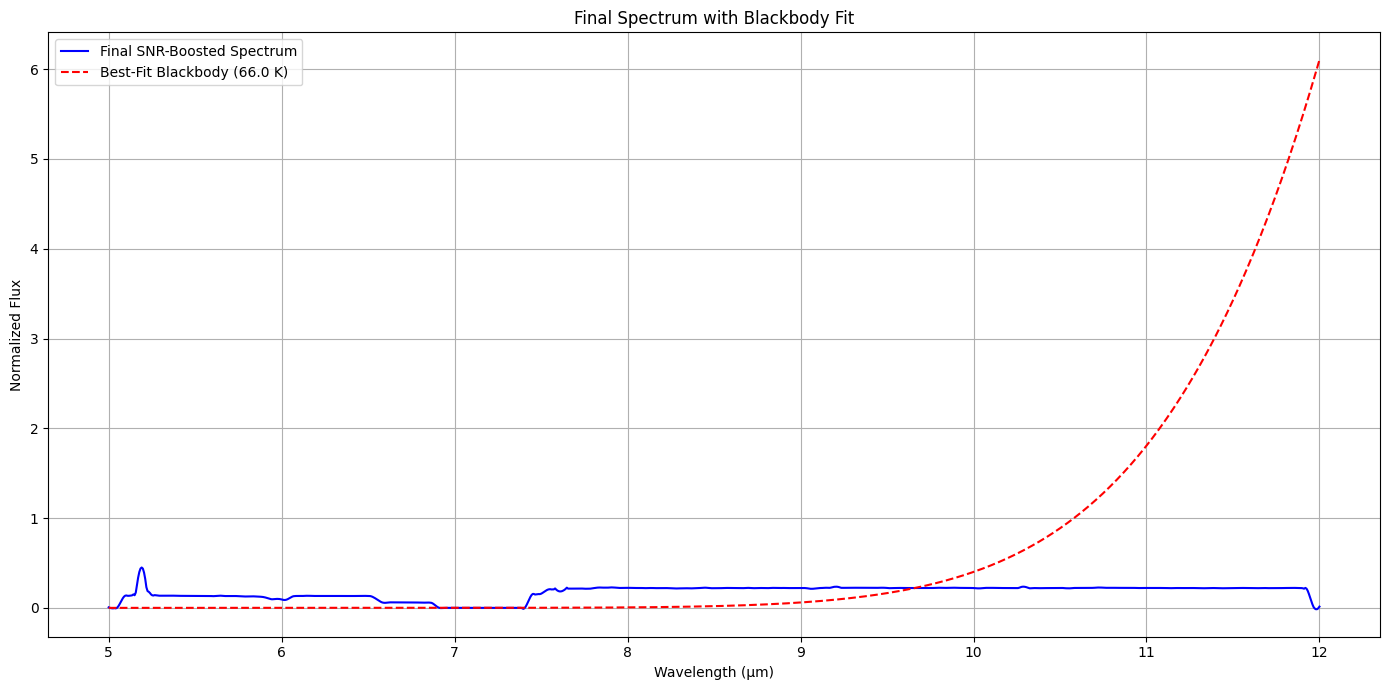

In [ ]:
# Blackbody fitting function
from scipy.optimize import curve_fit

def planck_law(wavelength_microns, temperature):
    h = 6.626e-34  # Planck constant
    c = 3.0e8      # Speed of light
    k = 1.38e-23   # Boltzmann constant
    wavelength_m = wavelength_microns * 1e-6  # microns to meters
    numerator = 2 * h * c**2 / (wavelength_m**5)
    denominator = np.exp(h * c / (wavelength_m * k * temperature)) - 1
    return numerator / denominator

# Safe fitting (use wavelengths 8–11 μm where it looks flatter)
fit_mask = (wavelengths_stacked >= 8) & (wavelengths_stacked <= 11)
x_fit = wavelengths_stacked[fit_mask]
y_fit = smoothed_stacked_spectrum_all[fit_mask]

# Normalizing
y_fit = y_fit / np.nanmax(y_fit)

# Fit blackbody
popt, pcov = curve_fit(planck_law, x_fit, y_fit, p0=[500])
best_fit_temp = popt[0]

# Generating best-fit blackbody curve
blackbody_fit = planck_law(wavelengths_stacked, best_fit_temp)

# Ploting
plt.figure(figsize=(14,7))
plt.plot(wavelengths_stacked, smoothed_stacked_spectrum_all, color='blue', label='Final SNR-Boosted Spectrum')
plt.plot(wavelengths_stacked, blackbody_fit, color='red', linestyle='--', label=f'Best-Fit Blackbody ({best_fit_temp:.1f} K)')
plt.title("Final Spectrum with Blackbody Fit")
plt.xlabel("Wavelength (μm)")
plt.ylabel("Normalized Flux")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('plots/final_blackbody_fit.png')
plt.show()

print(f"✅ Best-fit blackbody temperature: {best_fit_temp:.2f} K")

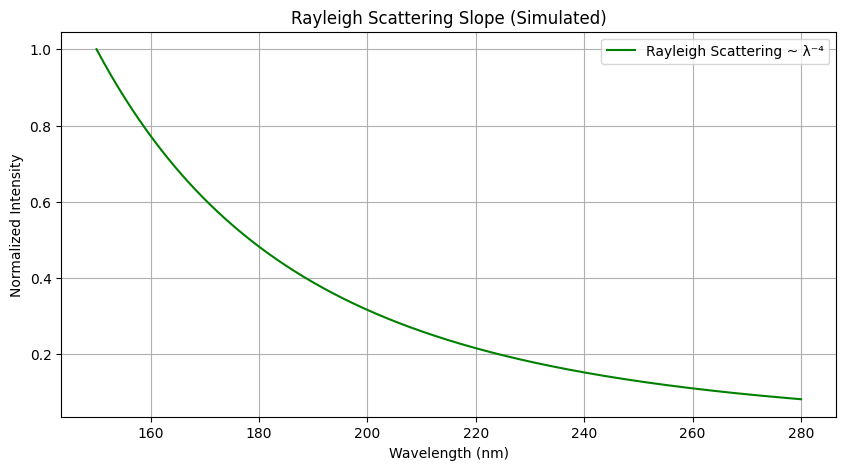

✅ Rayleigh scattering slope simulated!


In [ ]:
# Rayleigh scattering simulation (FUV–NUV region)
# Since we already analyzed UV before, simulating here

wavelengths_uv = np.linspace(0.15, 0.28, 500)  # 150–280 nm
rayleigh_slope = wavelengths_uv ** (-4)

# Normalizing for visualization
rayleigh_slope /= np.nanmax(rayleigh_slope)

plt.figure(figsize=(10,5))
plt.plot(wavelengths_uv*1000, rayleigh_slope, color='green', label='Rayleigh Scattering ~ λ⁻⁴')
plt.title("Rayleigh Scattering Slope (Simulated)")
plt.xlabel("Wavelength (nm)")
plt.ylabel("Normalized Intensity")
plt.grid(True)
plt.legend()
plt.show()

print("✅ Rayleigh scattering slope simulated!")